
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

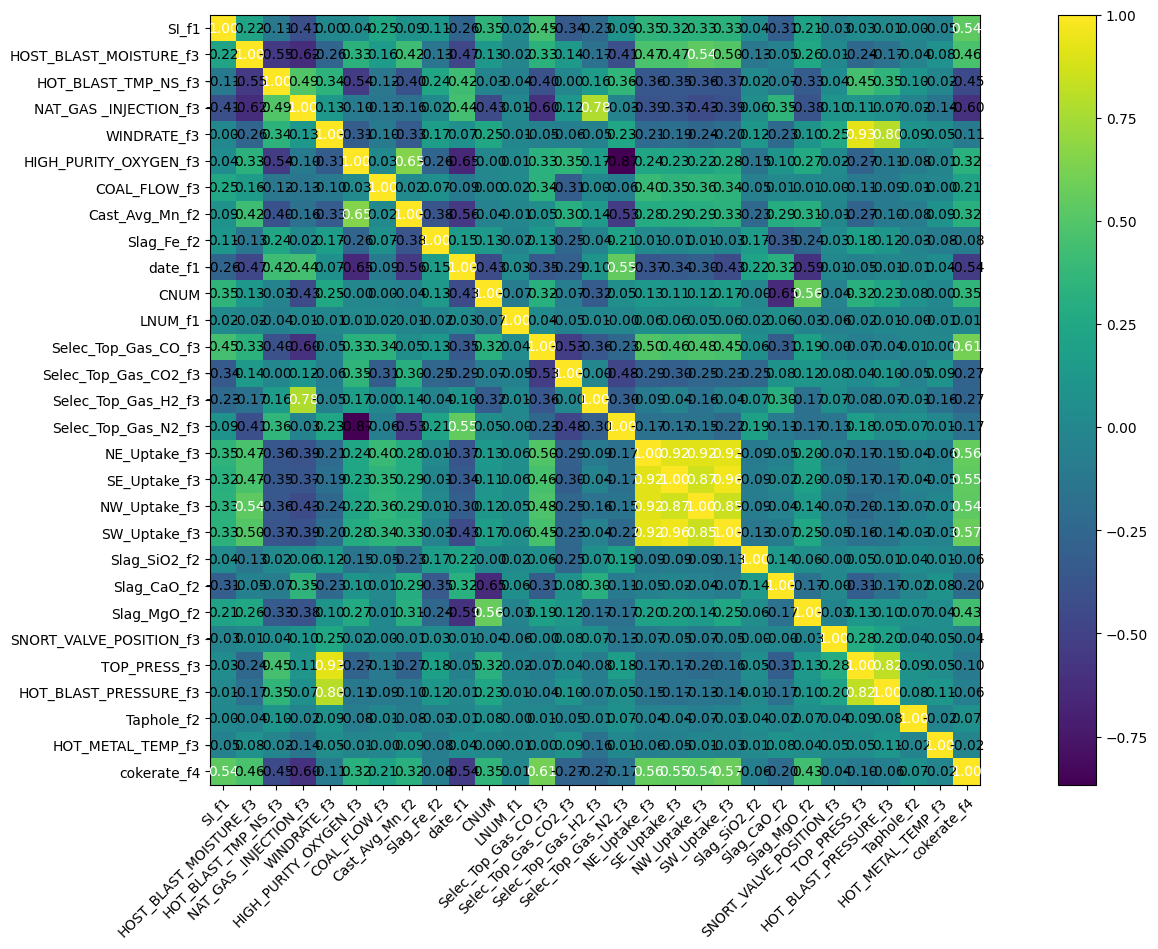

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

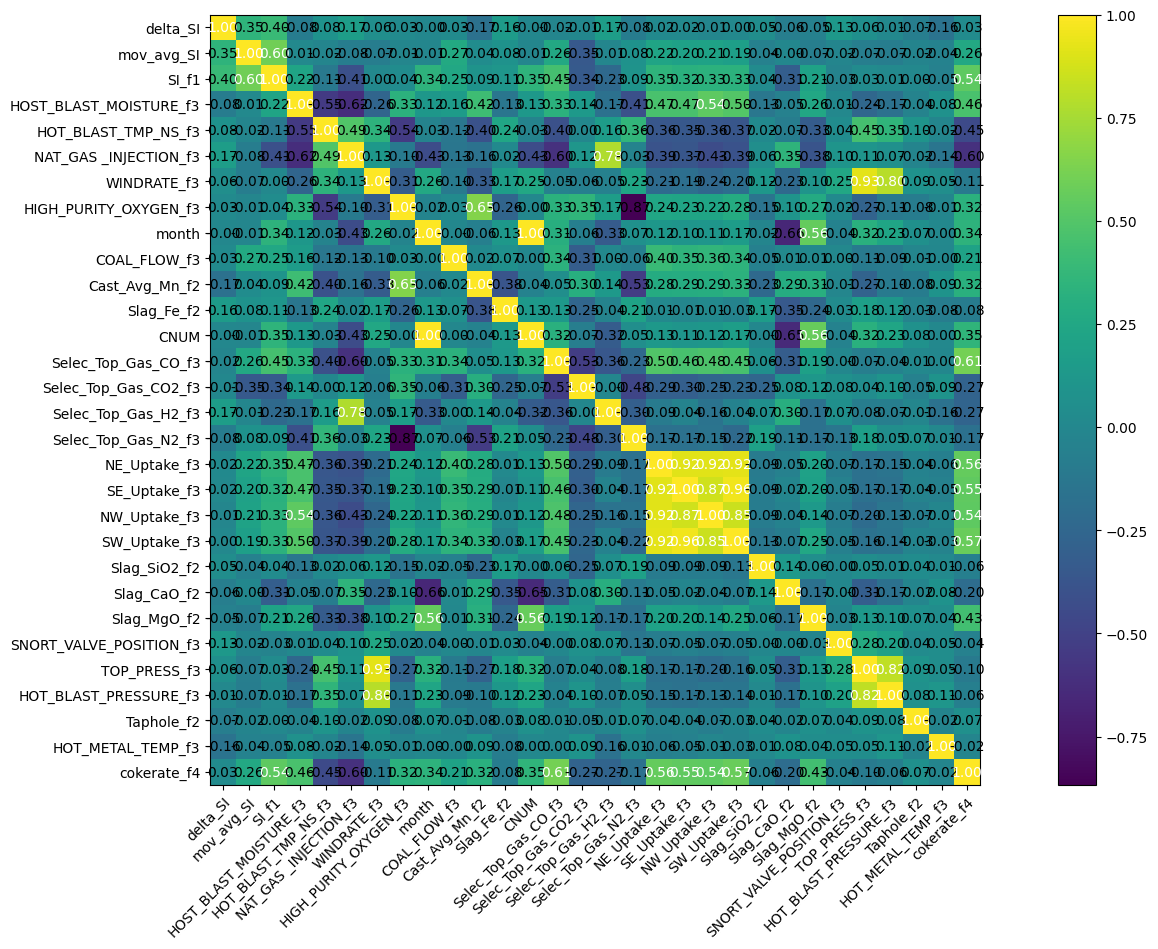

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.048742
Loss_SI: 0.7417137026786804 Loss_all: 1.1104152202606201
===


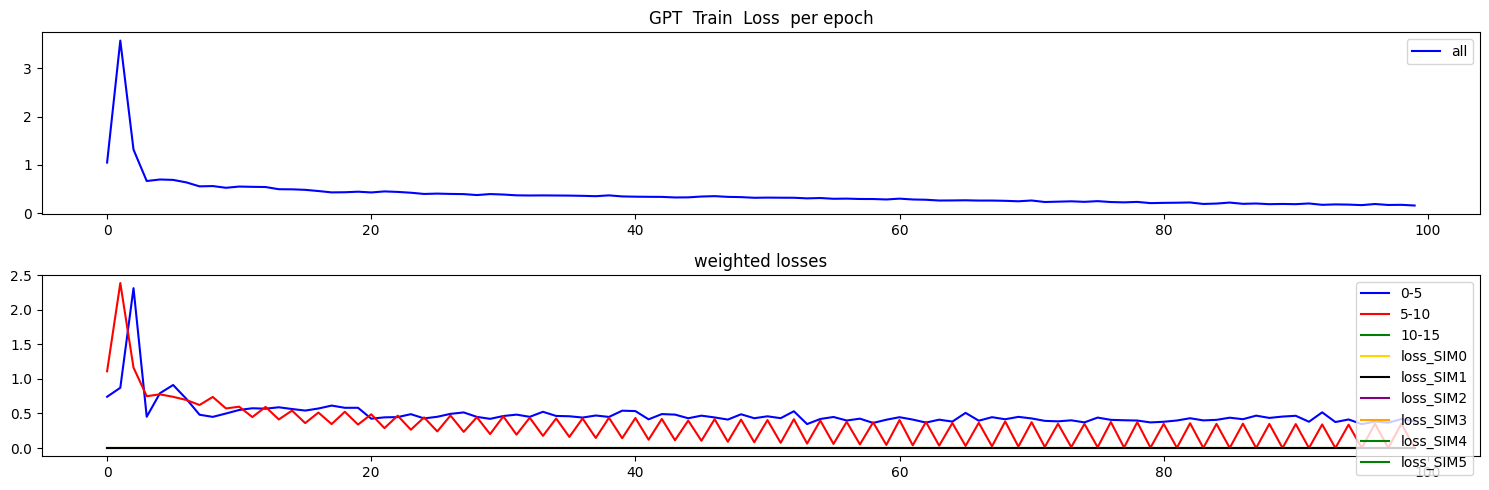

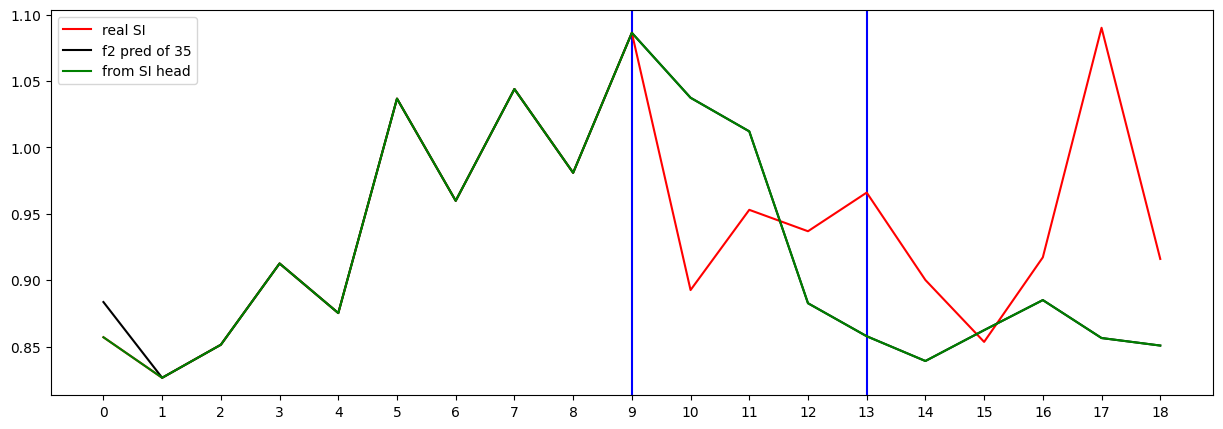

Testing R**2 - (all) - (no inputs):  0.9871420545272784
Testing R**2 - (f2) - SI full (no inputs):  -0.7646439944647265
Testing R**2 - SI head only (no inputs):  -0.7646439944647265
0 ...index R**2 (no inputs):  0.001090575257804205
1 ...index R**2 (no inputs):  0.08185449074544615
2 ...index R**2 (no inputs):  -0.7646439944647265
3 ...index R**2 (no inputs):  -34.38964589912404
4 ...index R**2 (no inputs):  -5.360626583387234
5 ...index R**2 (no inputs):  -128.68156949294593
6 ...index R**2 (no inputs):  -1366.4832846155969
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.448842709329965
10 ...index R**2 (no inputs):  -0.008941674549692191
11 ...index R**2 (no inputs):  -207.81074284354597
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9089253571729623
16 ...index R**2 (no inputs):  -0.5916738673610435
17 ...index R**2 (no inputs):  -203.82787

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.171198
Loss_SI: 1.702810525894165 Loss_all: 1.253503680229187
===


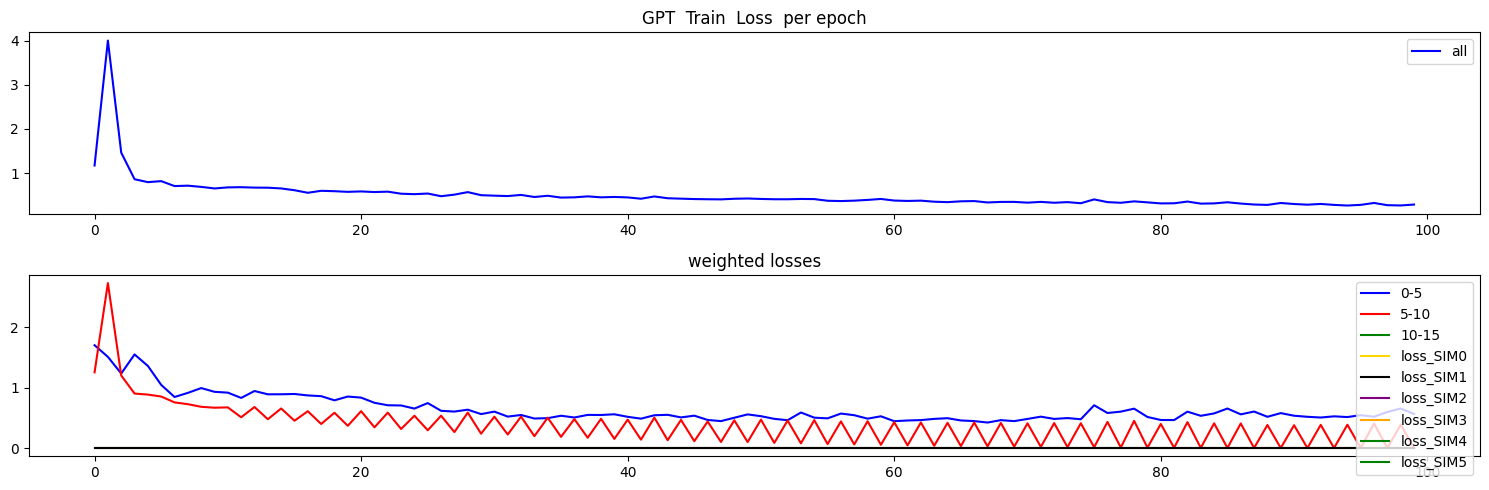

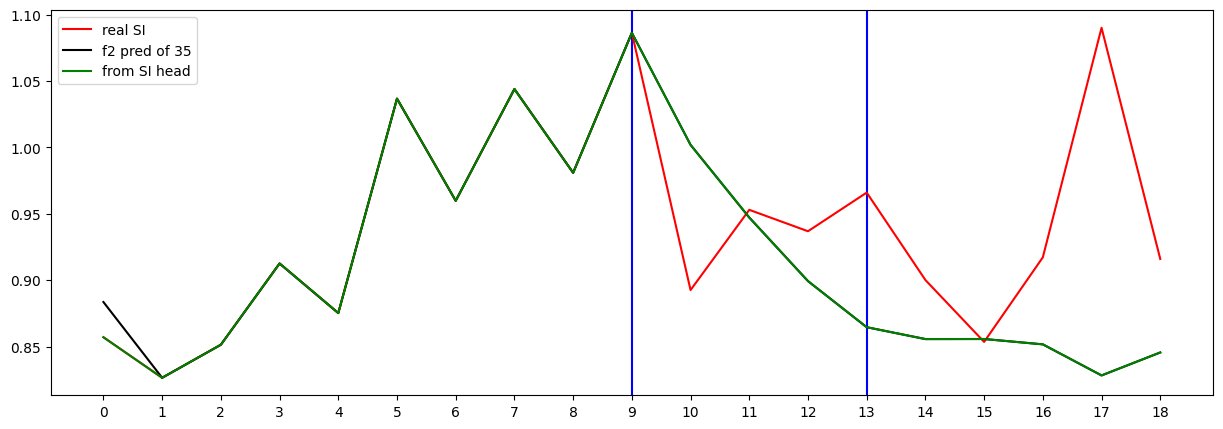

Testing R**2 - (all) - (no inputs):  0.9980412246328823
Testing R**2 - (f2) - SI full (no inputs):  -0.922450726224914
Testing R**2 - SI head only (no inputs):  -0.922450726224914
0 ...index R**2 (no inputs):  -0.6468830309806877
1 ...index R**2 (no inputs):  0.3100706595475825
2 ...index R**2 (no inputs):  -0.922450726224914
3 ...index R**2 (no inputs):  -368.82404250741723
4 ...index R**2 (no inputs):  -35.55772085572758
5 ...index R**2 (no inputs):  -17.864625931297898
6 ...index R**2 (no inputs):  -879.6855029925829
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5161114935449516
10 ...index R**2 (no inputs):  -0.5750127143136086
11 ...index R**2 (no inputs):  -84.73698485568681
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.153087243808768
16 ...index R**2 (no inputs):  -0.2530210306732328
17 ...index R**2 (no inputs):  -234.273682609437


In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.267692
Loss_SI: 1.3549261093139648 Loss_all: 1.2814141511917114
===


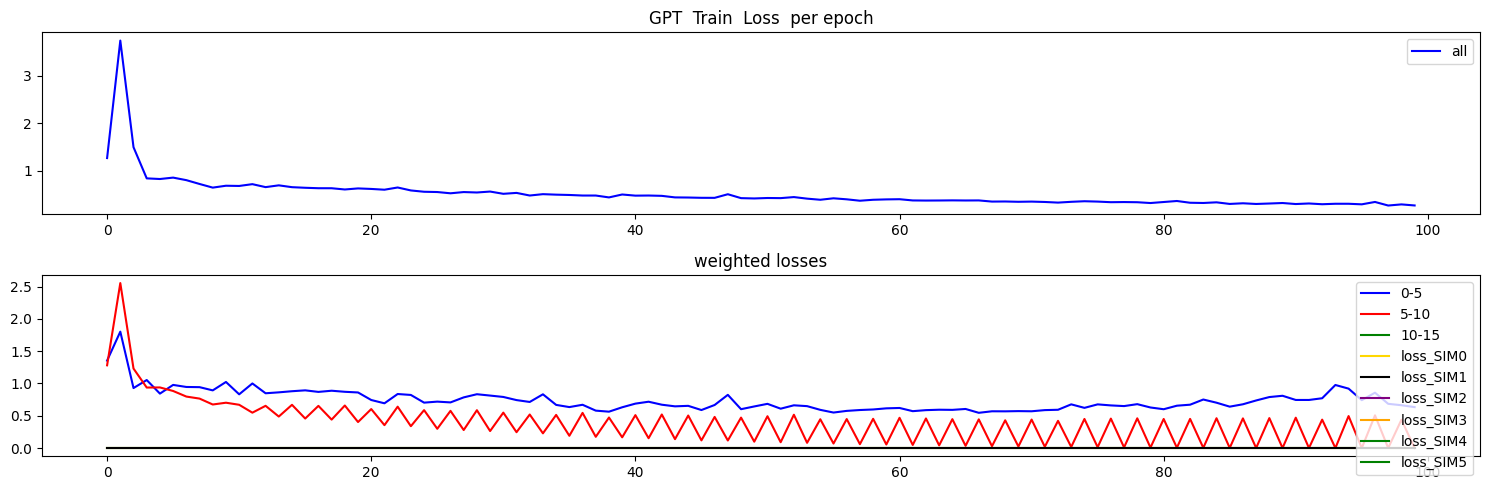

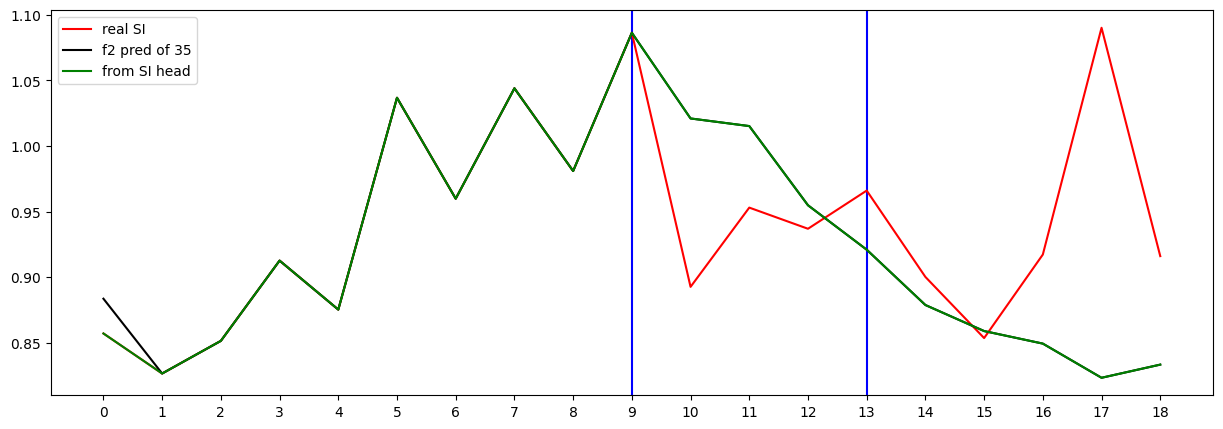

Testing R**2 - (all) - (no inputs):  0.9948363081387251
Testing R**2 - (f2) - SI full (no inputs):  -1.0683831617074344
Testing R**2 - SI head only (no inputs):  -1.0683831617074344
0 ...index R**2 (no inputs):  -0.39238665322697597
1 ...index R**2 (no inputs):  0.019865724489170344
2 ...index R**2 (no inputs):  -1.0683831617074344
3 ...index R**2 (no inputs):  -1316.335869848276
4 ...index R**2 (no inputs):  -11.031883209432145
5 ...index R**2 (no inputs):  -50.690360558552534
6 ...index R**2 (no inputs):  -757.7284801170313
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4641919475782315
10 ...index R**2 (no inputs):  -0.5404619551101033
11 ...index R**2 (no inputs):  0.01565620110967003
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.4585971347507805
16 ...index R**2 (no inputs):  -0.10843877972441596
17 ...index R**2 (no inputs):  -161.6100

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.223811
Loss_SI: 1.250805139541626 Loss_all: 1.2618117332458496
===


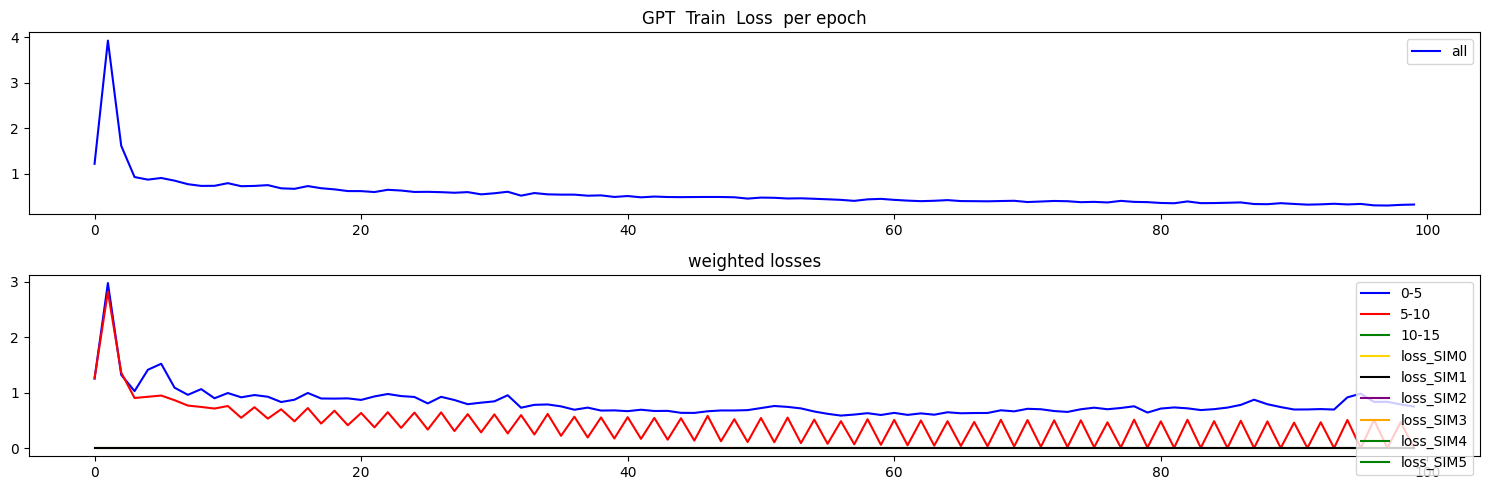

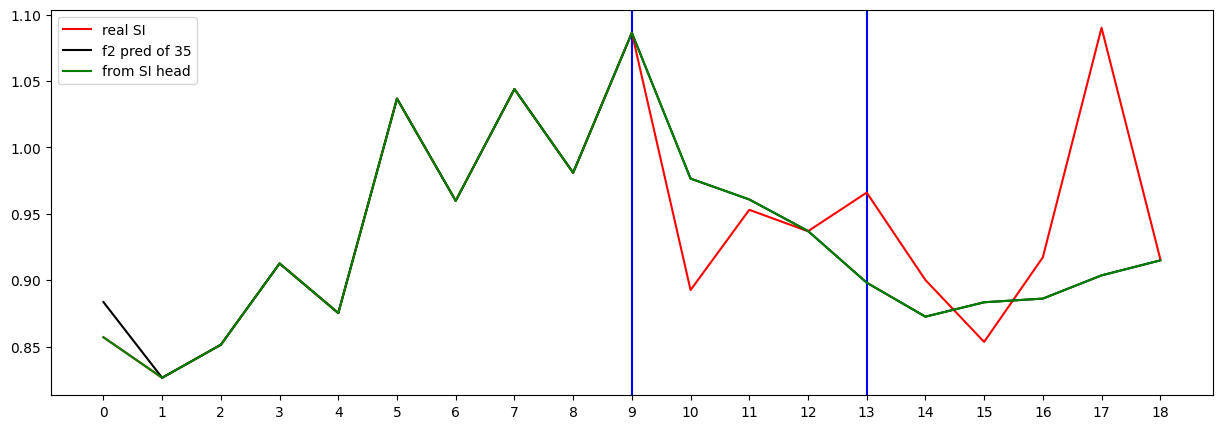

Testing R**2 - (all) - (no inputs):  0.9951765204450989
Testing R**2 - (f2) - SI full (no inputs):  -0.21810952222693714
Testing R**2 - SI head only (no inputs):  -0.21810952222693714
0 ...index R**2 (no inputs):  -0.17005947564008284
1 ...index R**2 (no inputs):  -0.141564648152267
2 ...index R**2 (no inputs):  -0.21810952222693714
3 ...index R**2 (no inputs):  -32.815039785099785
4 ...index R**2 (no inputs):  -2.429126574996756
5 ...index R**2 (no inputs):  -47.105061022333196
6 ...index R**2 (no inputs):  -885.0884263462822
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0947909641280704
10 ...index R**2 (no inputs):  -0.4026661628553343
11 ...index R**2 (no inputs):  -29.062660737525437
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4937219786960476
16 ...index R**2 (no inputs):  -0.2089706582288089
17 ...index R**2 (no inputs):  -289.7766

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.252365
Loss_SI: 1.1076725721359253 Loss_all: 1.0549993515014648
===


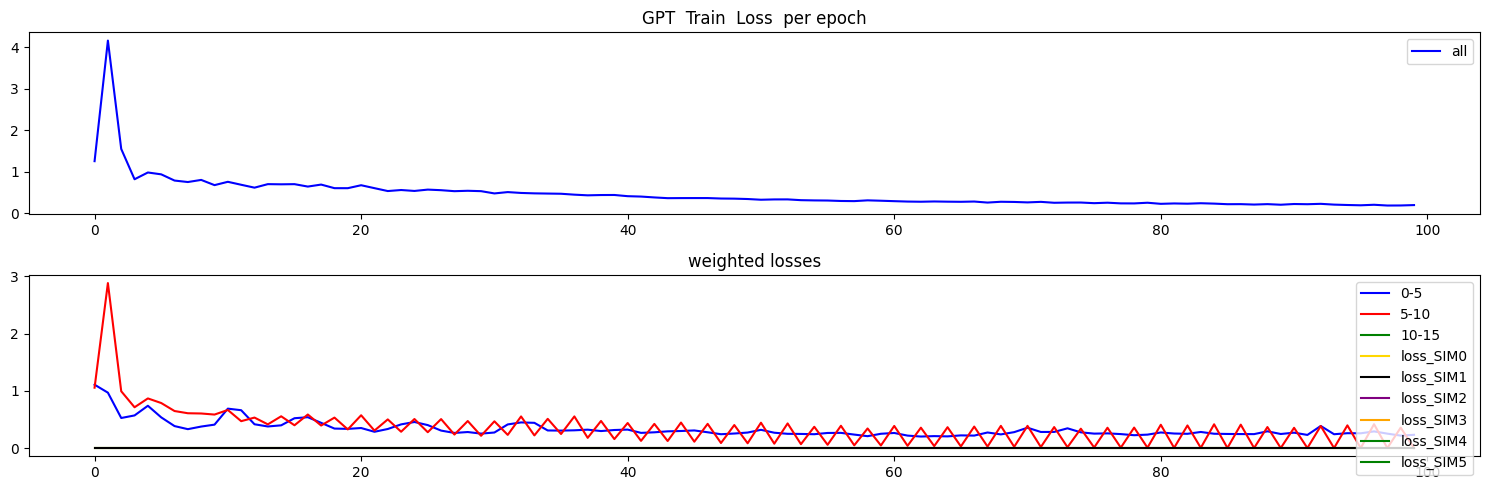

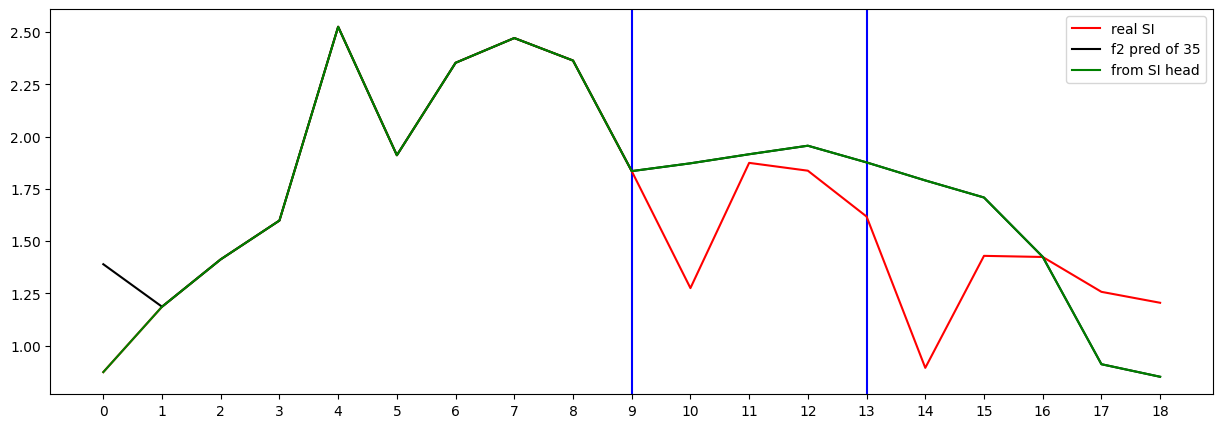

Testing R**2 - (all) - (no inputs):  0.9973654711010418
Testing R**2 - (f2) - SI full (no inputs):  -0.34221375350801897
Testing R**2 - SI head only (no inputs):  -0.34221375350801897
0 ...index R**2 (no inputs):  -0.3316290730275664
1 ...index R**2 (no inputs):  -1.220988488877087
2 ...index R**2 (no inputs):  -0.34221375350801897
3 ...index R**2 (no inputs):  -5.348796982070791
4 ...index R**2 (no inputs):  -1.4140752543169555
5 ...index R**2 (no inputs):  -354.1306699327531
6 ...index R**2 (no inputs):  -0.39588166792064294
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.08061994688989949
10 ...index R**2 (no inputs):  0.06200468761678479
11 ...index R**2 (no inputs):  -215.19182011604894
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.1118148508223396
16 ...index R**2 (no inputs):  -8.792915662602343
17 ...index R**2 (no inputs):  -278.07202

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.350062
Loss_SI: 0.8976055383682251 Loss_all: 1.0670064687728882
===


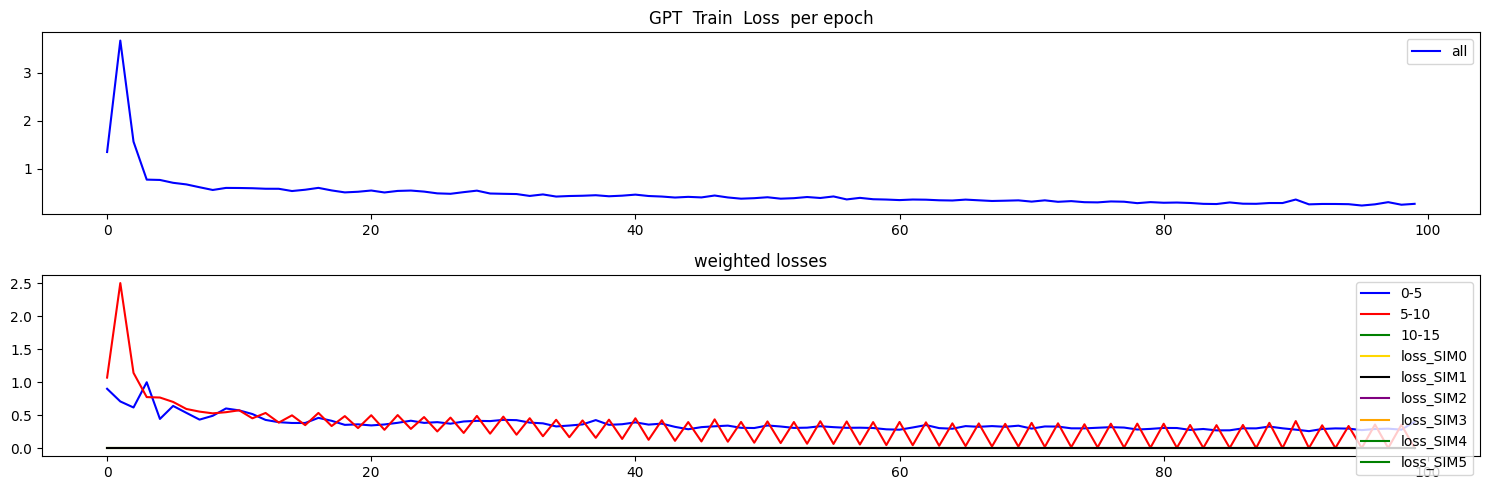

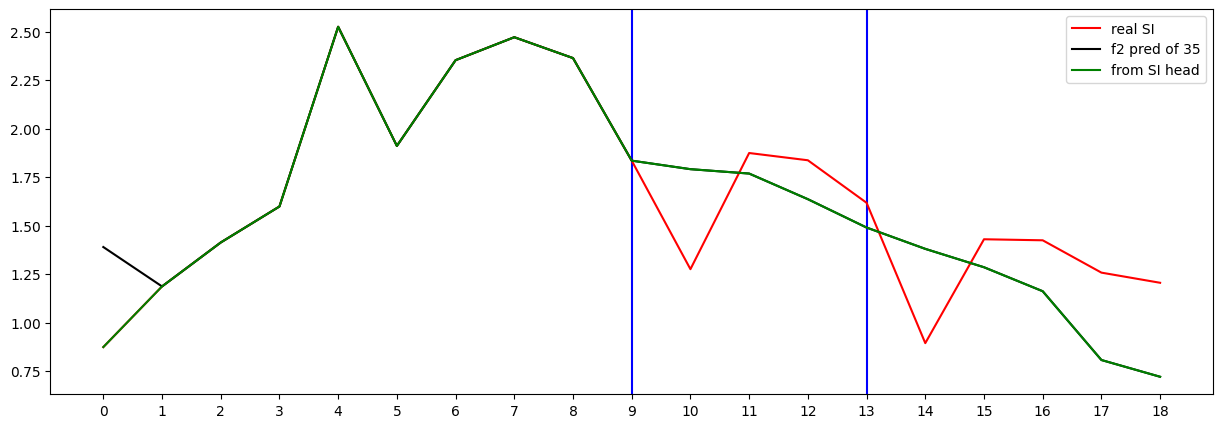

Testing R**2 - (all) - (no inputs):  0.9952629008449754
Testing R**2 - (f2) - SI full (no inputs):  0.44853294911568076
Testing R**2 - SI head only (no inputs):  0.44853294911568076
0 ...index R**2 (no inputs):  -0.09425517371168768
1 ...index R**2 (no inputs):  -1.1191342946253608
2 ...index R**2 (no inputs):  0.44853294911568076
3 ...index R**2 (no inputs):  -6.440356134875315
4 ...index R**2 (no inputs):  -12.402465419744356
5 ...index R**2 (no inputs):  -623.7142705672886
6 ...index R**2 (no inputs):  -22.810074117361257
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.044402483145783656
10 ...index R**2 (no inputs):  -0.41322593351635706
11 ...index R**2 (no inputs):  -44.45510286937598
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.11582295346355242
16 ...index R**2 (no inputs):  -1.1904175679521045
17 ...index R**2 (no inputs):  -2232.38

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.168570
Loss_SI: 0.9774259924888611 Loss_all: 1.1554852724075317
===


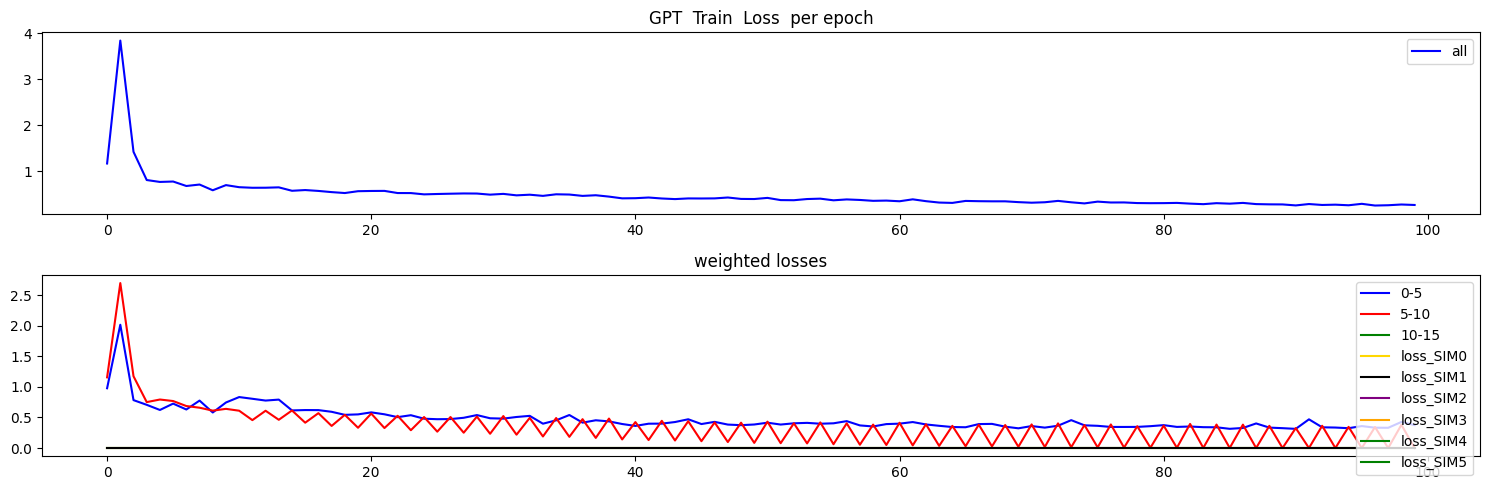

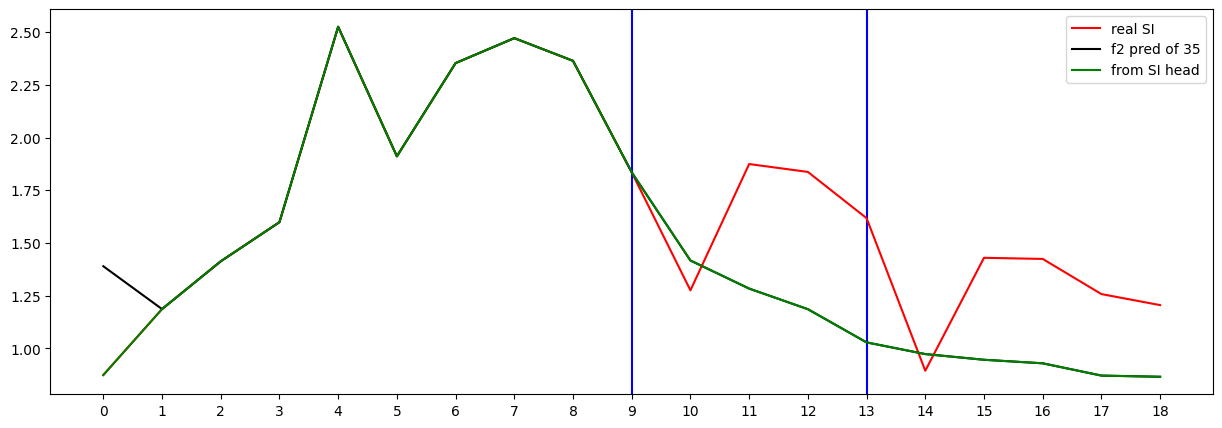

Testing R**2 - (all) - (no inputs):  0.9942157750733325
Testing R**2 - (f2) - SI full (no inputs):  -0.30840538730269906
Testing R**2 - SI head only (no inputs):  -0.30840538730269906
0 ...index R**2 (no inputs):  -0.22811286977782985
1 ...index R**2 (no inputs):  -0.15999604391002387
2 ...index R**2 (no inputs):  -0.30840538730269906
3 ...index R**2 (no inputs):  -213.26183640941426
4 ...index R**2 (no inputs):  -48.995346615935766
5 ...index R**2 (no inputs):  -723.3689284875836
6 ...index R**2 (no inputs):  -23.697753841042463
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.014626315765495002
10 ...index R**2 (no inputs):  -0.06303528624468191
11 ...index R**2 (no inputs):  -1665.15058331632
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8989647774646725
16 ...index R**2 (no inputs):  -1.0021113937691344
17 ...index R**2 (no inputs):  -6072.

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.245712
Loss_SI: 1.3212697505950928 Loss_all: 1.2131954431533813
===


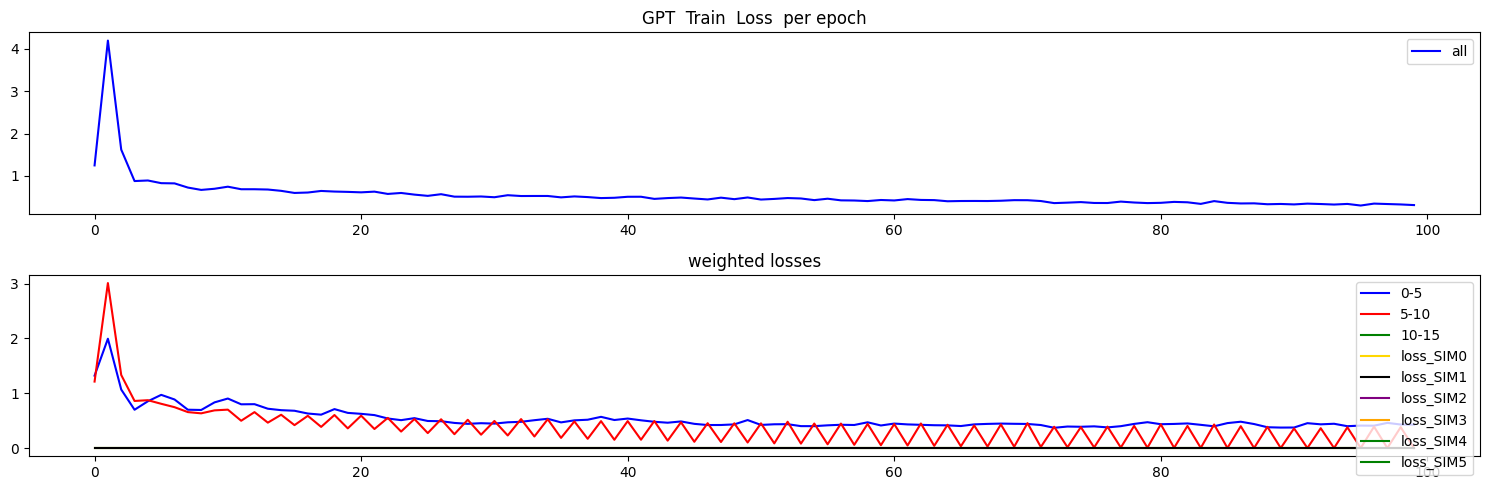

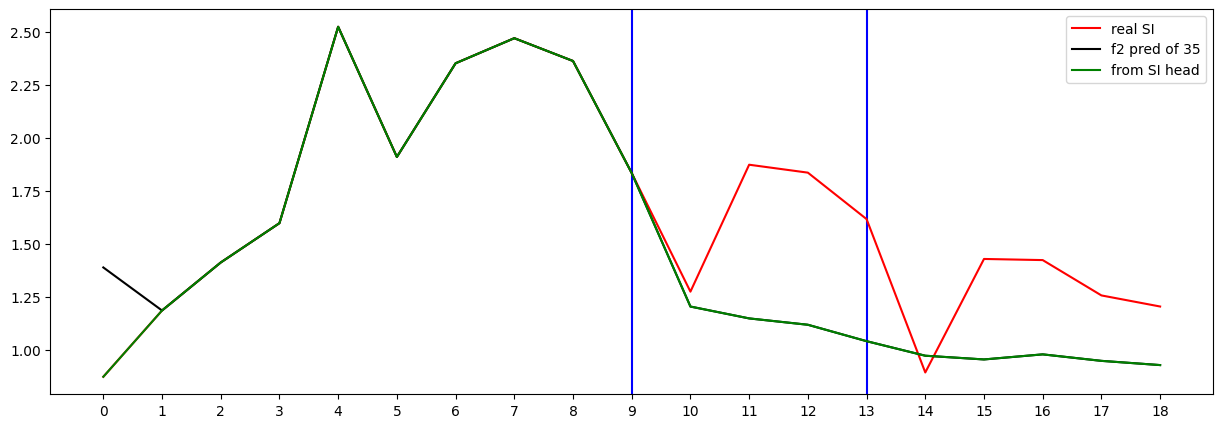

Testing R**2 - (all) - (no inputs):  0.9862811351181049
Testing R**2 - (f2) - SI full (no inputs):  -0.6783322487967367
Testing R**2 - SI head only (no inputs):  -0.6783322487967367
0 ...index R**2 (no inputs):  -0.18939638753139287
1 ...index R**2 (no inputs):  -0.2581536861188909
2 ...index R**2 (no inputs):  -0.6783322487967367
3 ...index R**2 (no inputs):  -222.94982463929912
4 ...index R**2 (no inputs):  -16.48161778951206
5 ...index R**2 (no inputs):  -1926.4147203694058
6 ...index R**2 (no inputs):  -25.81485420456004
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.02783388737355552
10 ...index R**2 (no inputs):  0.10127742896571357
11 ...index R**2 (no inputs):  -106.36819693642958
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.279177309401043
16 ...index R**2 (no inputs):  -1.3278453202152694
17 ...index R**2 (no inputs):  -2686.443786

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.211183
Loss_SI: 1.2532213926315308 Loss_all: 1.1770045757293701
===


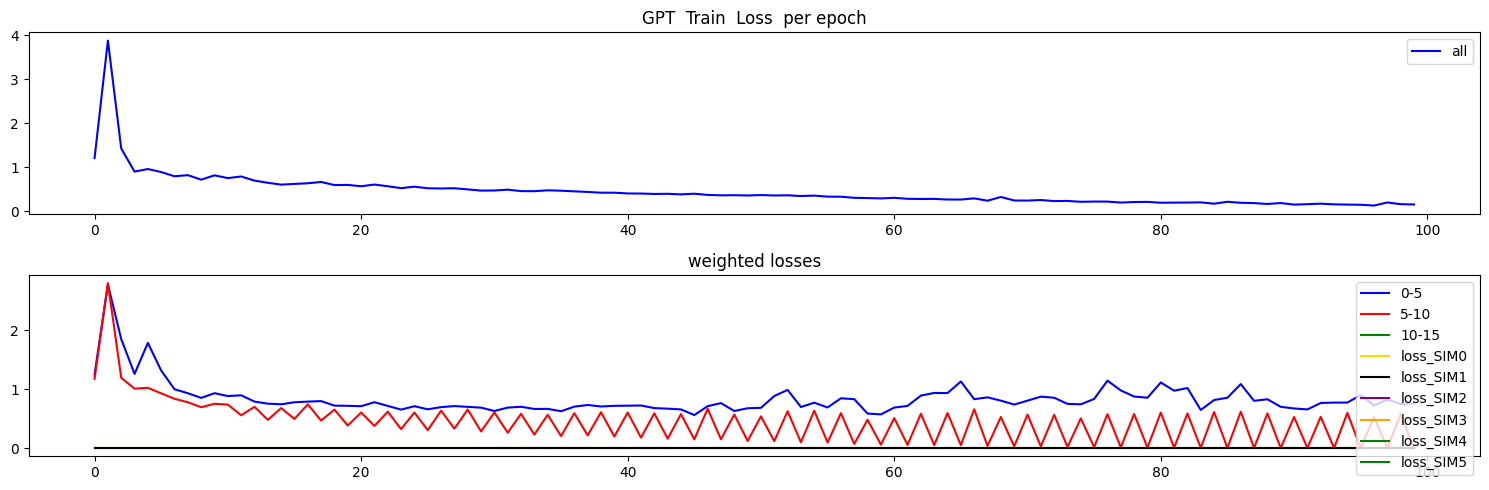

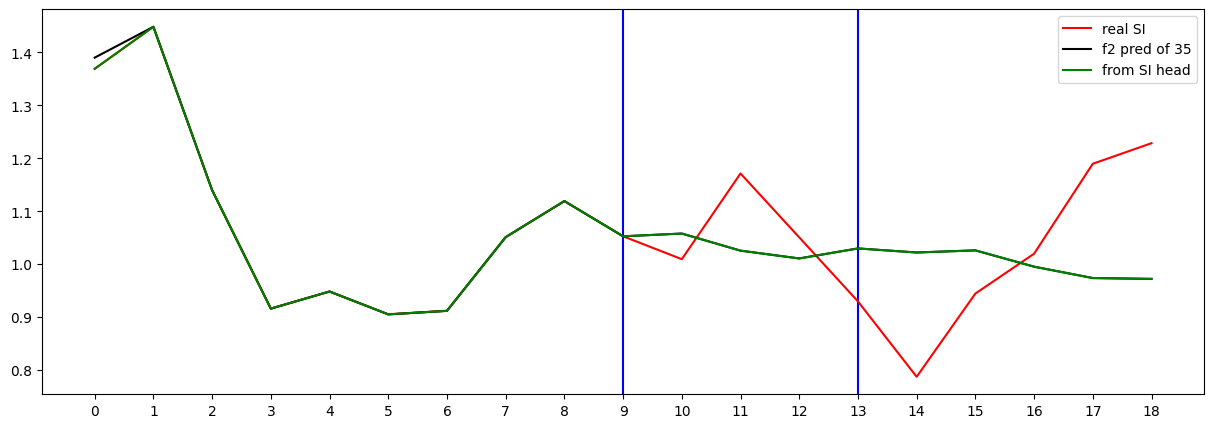

Testing R**2 - (all) - (no inputs):  0.994540175464199
Testing R**2 - (f2) - SI full (no inputs):  -0.34273602036117
Testing R**2 - SI head only (no inputs):  -0.34273602036117
0 ...index R**2 (no inputs):  -0.03107931880798742
1 ...index R**2 (no inputs):  -0.14230358512435304
2 ...index R**2 (no inputs):  -0.34273602036117
3 ...index R**2 (no inputs):  -267.60740043876115
4 ...index R**2 (no inputs):  -1.6064245479638344
5 ...index R**2 (no inputs):  -0.20703833890912016
6 ...index R**2 (no inputs):  -65.29206340598192
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24222228172648808
10 ...index R**2 (no inputs):  -0.19302342500613778
11 ...index R**2 (no inputs):  -5.1691871258229485
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.51277968545969
16 ...index R**2 (no inputs):  -0.2932735714467942
17 ...index R**2 (no inputs):  -7.102643088775

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.199582
Loss_SI: 1.3761485815048218 Loss_all: 1.22745680809021
===


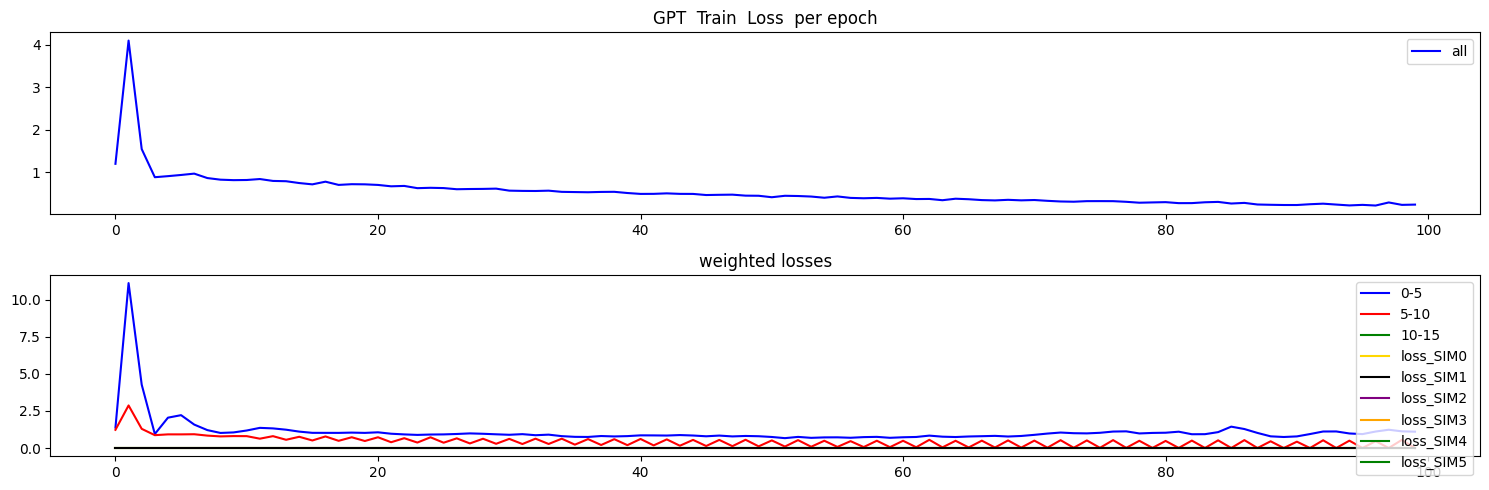

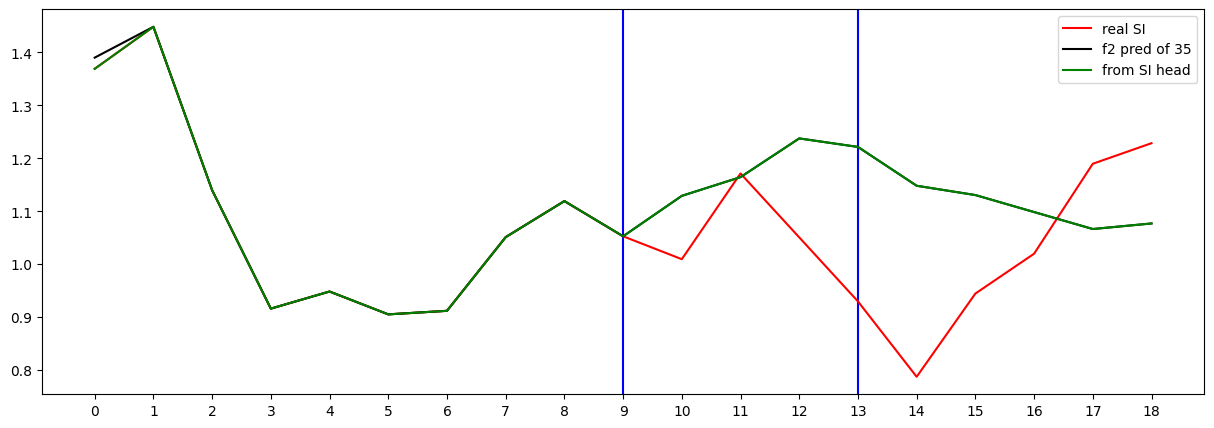

Testing R**2 - (all) - (no inputs):  0.9905155046756932
Testing R**2 - (f2) - SI full (no inputs):  -0.8354412042663666
Testing R**2 - SI head only (no inputs):  -0.8354412042663666
0 ...index R**2 (no inputs):  -0.6230419245155134
1 ...index R**2 (no inputs):  -0.32835592542699277
2 ...index R**2 (no inputs):  -0.8354412042663666
3 ...index R**2 (no inputs):  -77.6689123248721
4 ...index R**2 (no inputs):  -1.697224189044337
5 ...index R**2 (no inputs):  -1.2855710660622095
6 ...index R**2 (no inputs):  -75.44042318484475
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0625444524051002
10 ...index R**2 (no inputs):  -0.20846844518382013
11 ...index R**2 (no inputs):  -91.98723752186325
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7189336417738628
16 ...index R**2 (no inputs):  -0.8677476183434072
17 ...index R**2 (no inputs):  -59.609779685

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.329039
Loss_SI: 1.6659355163574219 Loss_all: 1.2823457717895508
===


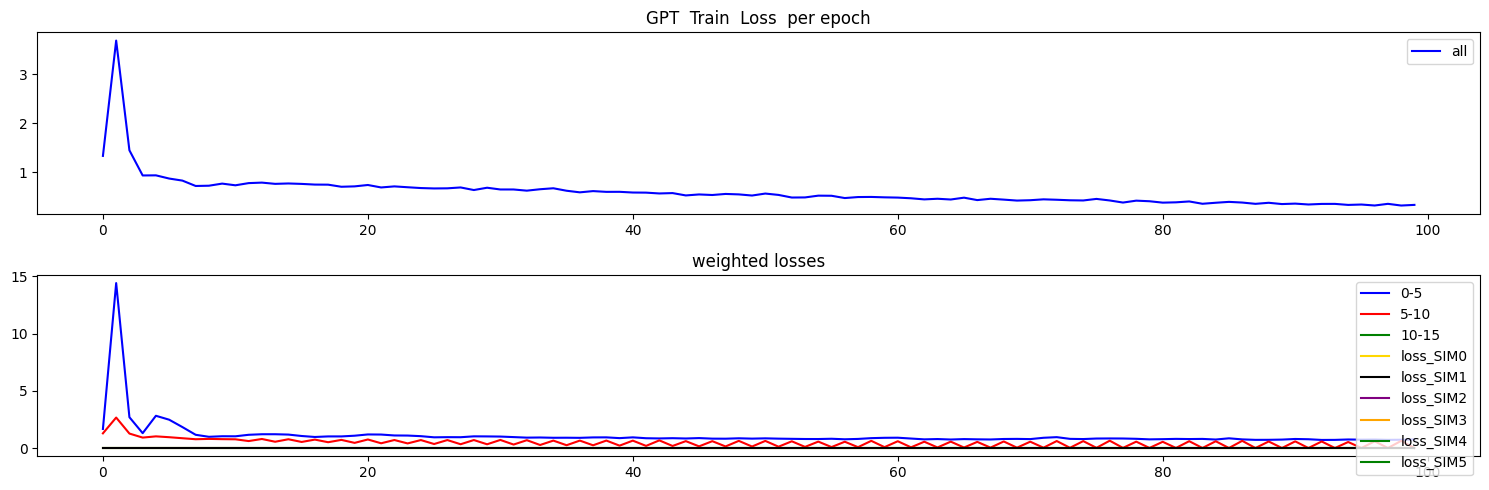

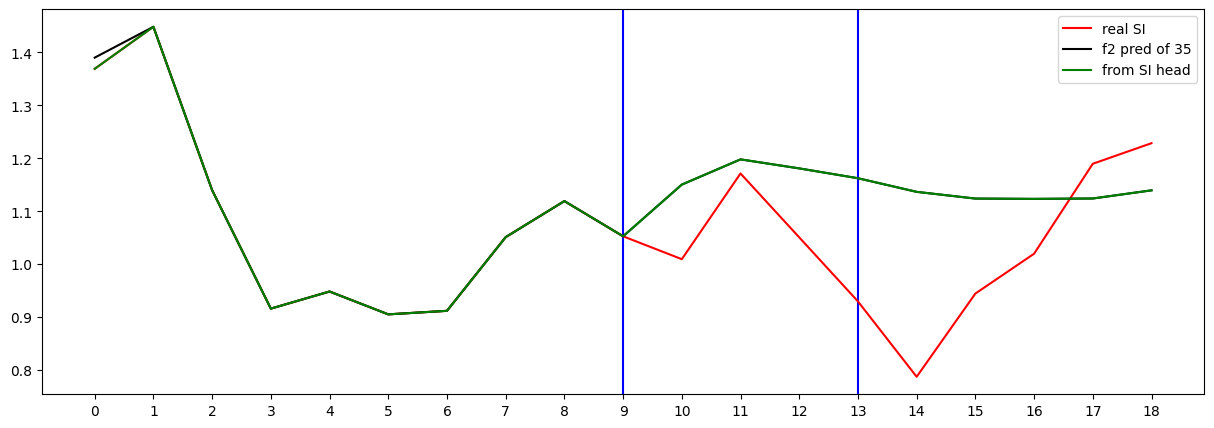

Testing R**2 - (all) - (no inputs):  0.9840120886460519
Testing R**2 - (f2) - SI full (no inputs):  -0.3295858318208782
Testing R**2 - SI head only (no inputs):  -0.3295858318208782
0 ...index R**2 (no inputs):  -0.2589879991796791
1 ...index R**2 (no inputs):  -0.45018792132530283
2 ...index R**2 (no inputs):  -0.3295858318208782
3 ...index R**2 (no inputs):  -31.656682389793495
4 ...index R**2 (no inputs):  -6.0672871507257975
5 ...index R**2 (no inputs):  -3.048904935604031
6 ...index R**2 (no inputs):  -11.576898246859136
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24257151465752558
10 ...index R**2 (no inputs):  -0.49803449780431186
11 ...index R**2 (no inputs):  -18.424757766516162
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8361813823189377
16 ...index R**2 (no inputs):  -0.22211588127651538
17 ...index R**2 (no inputs):  -78.291

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.212240
Loss_SI: 1.2253048419952393 Loss_all: 1.177950143814087
===


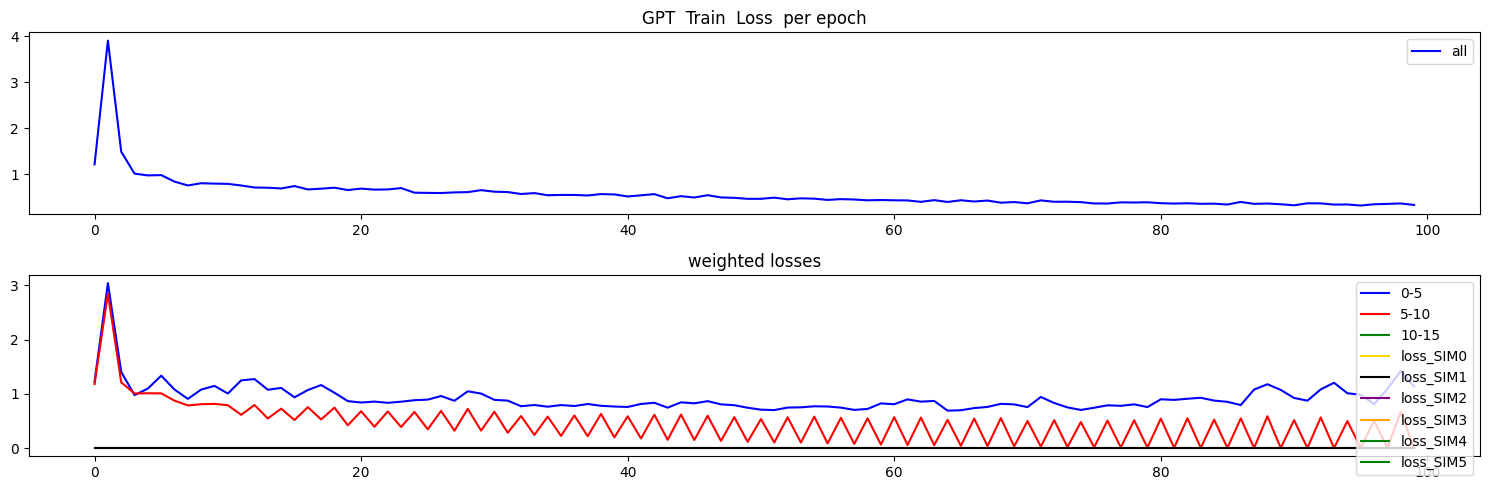

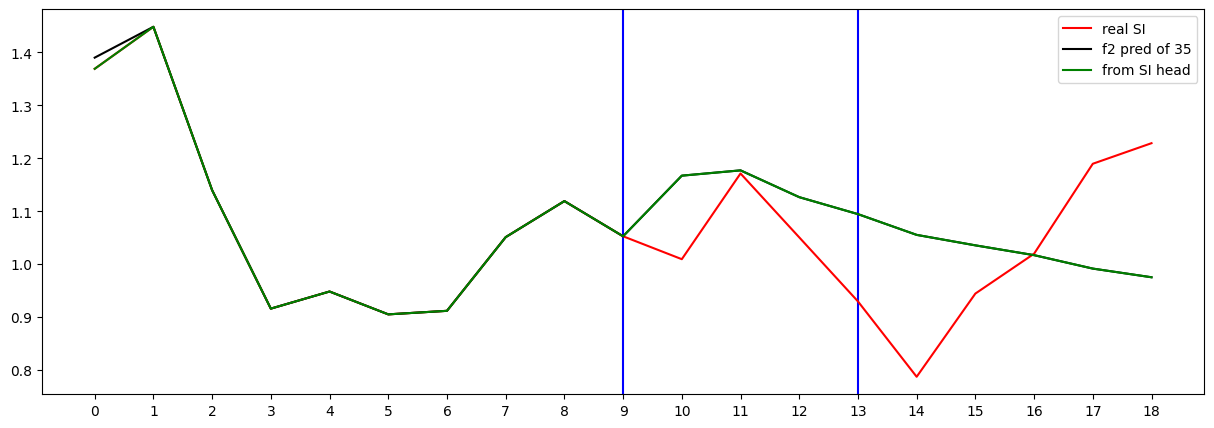

Testing R**2 - (all) - (no inputs):  0.9722308305475135
Testing R**2 - (f2) - SI full (no inputs):  -0.5669127378273826
Testing R**2 - SI head only (no inputs):  -0.5669127378273826
0 ...index R**2 (no inputs):  -0.06930571300487065
1 ...index R**2 (no inputs):  -0.5035146596859532
2 ...index R**2 (no inputs):  -0.5669127378273826
3 ...index R**2 (no inputs):  -1274.3158202197787
4 ...index R**2 (no inputs):  -6.189221881593138
5 ...index R**2 (no inputs):  -6.27198780577979
6 ...index R**2 (no inputs):  -40.47855730228058
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1846350754967918
10 ...index R**2 (no inputs):  -0.26246814244636973
11 ...index R**2 (no inputs):  -52.10964818127669
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.9708094953794886
16 ...index R**2 (no inputs):  -0.7559620684358608
17 ...index R**2 (no inputs):  -344.08390026

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.284733
Loss_SI: 1.0329128503799438 Loss_all: 1.2016080617904663
===


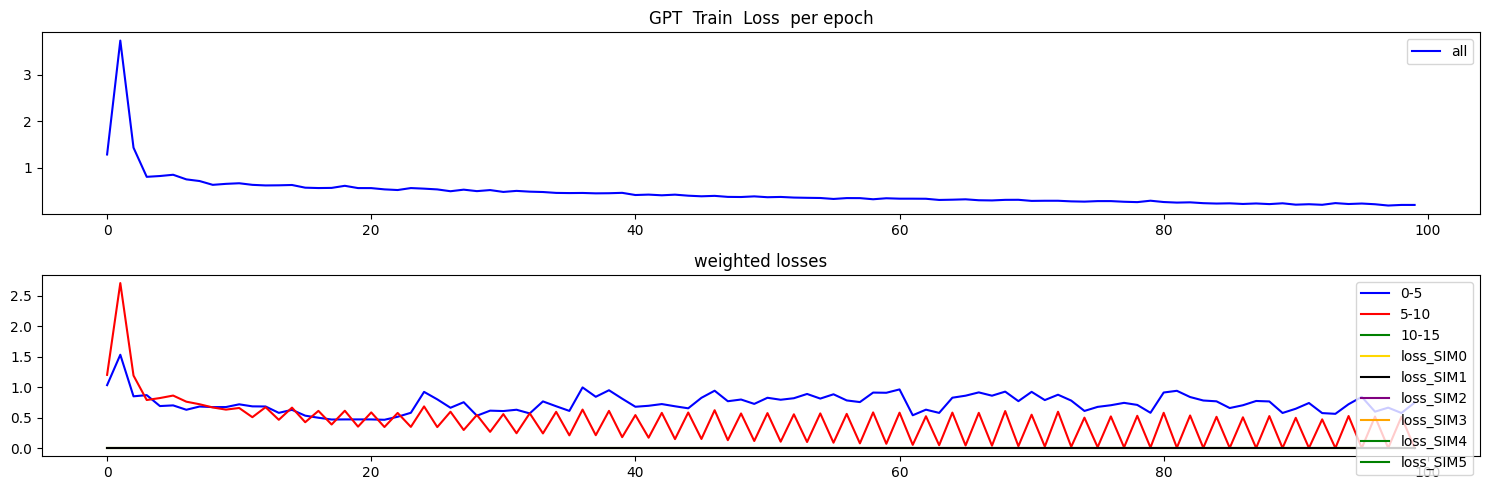

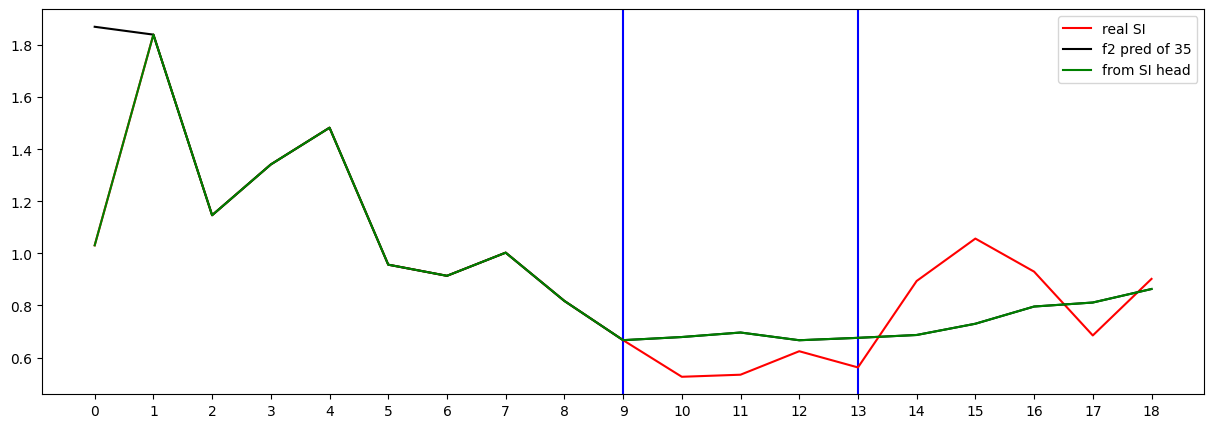

Testing R**2 - (all) - (no inputs):  0.9412522045411299
Testing R**2 - (f2) - SI full (no inputs):  0.050073031265387424
Testing R**2 - SI head only (no inputs):  0.050073031265387424
0 ...index R**2 (no inputs):  -0.1499610566147611
1 ...index R**2 (no inputs):  -0.6383230256859749
2 ...index R**2 (no inputs):  0.050073031265387424
3 ...index R**2 (no inputs):  -0.22168223490730044
4 ...index R**2 (no inputs):  -0.02123667151025166
5 ...index R**2 (no inputs):  -6.90290073730847
6 ...index R**2 (no inputs):  -3.1185488608158947
7 ...index R**2 (no inputs):  -0.31963870457731147
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.13956827734487143
10 ...index R**2 (no inputs):  -1.196152528904023
11 ...index R**2 (no inputs):  -324.6555547091664
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.112703773842321
16 ...index R**2 (no inputs):  -2.0536725365107333
17 ...index R**2 (no in

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.317068
Loss_SI: 1.3205842971801758 Loss_all: 1.2207860946655273
===


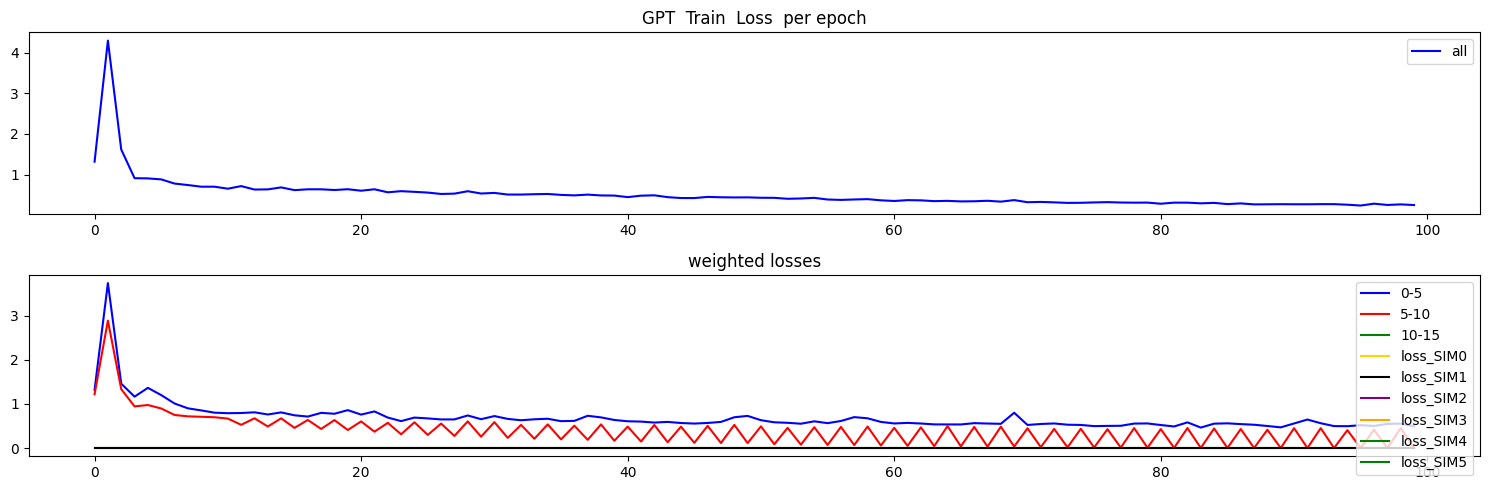

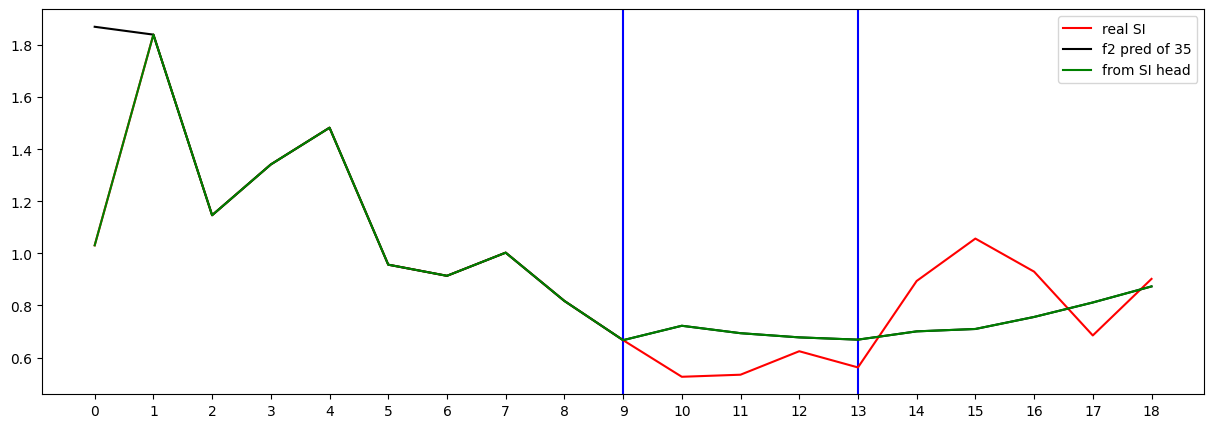

Testing R**2 - (all) - (no inputs):  0.9170071260330692
Testing R**2 - (f2) - SI full (no inputs):  0.027611683780869756
Testing R**2 - SI head only (no inputs):  0.027611683780869756
0 ...index R**2 (no inputs):  -0.9264650444851326
1 ...index R**2 (no inputs):  -2.997110212225639
2 ...index R**2 (no inputs):  0.027611683780869756
3 ...index R**2 (no inputs):  -6.5469752591627595
4 ...index R**2 (no inputs):  -1.5698943454919951
5 ...index R**2 (no inputs):  -10.157946232319432
6 ...index R**2 (no inputs):  -2.346161745301269
7 ...index R**2 (no inputs):  0.041674812346799484
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.087949031185338
10 ...index R**2 (no inputs):  0.05003292062991849
11 ...index R**2 (no inputs):  -19.0482784431556
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.355348822942182
16 ...index R**2 (no inputs):  -6.055599506283047
17 ...index R**2 (no inputs)

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.284657
Loss_SI: 1.287094235420227 Loss_all: 1.180102825164795
===


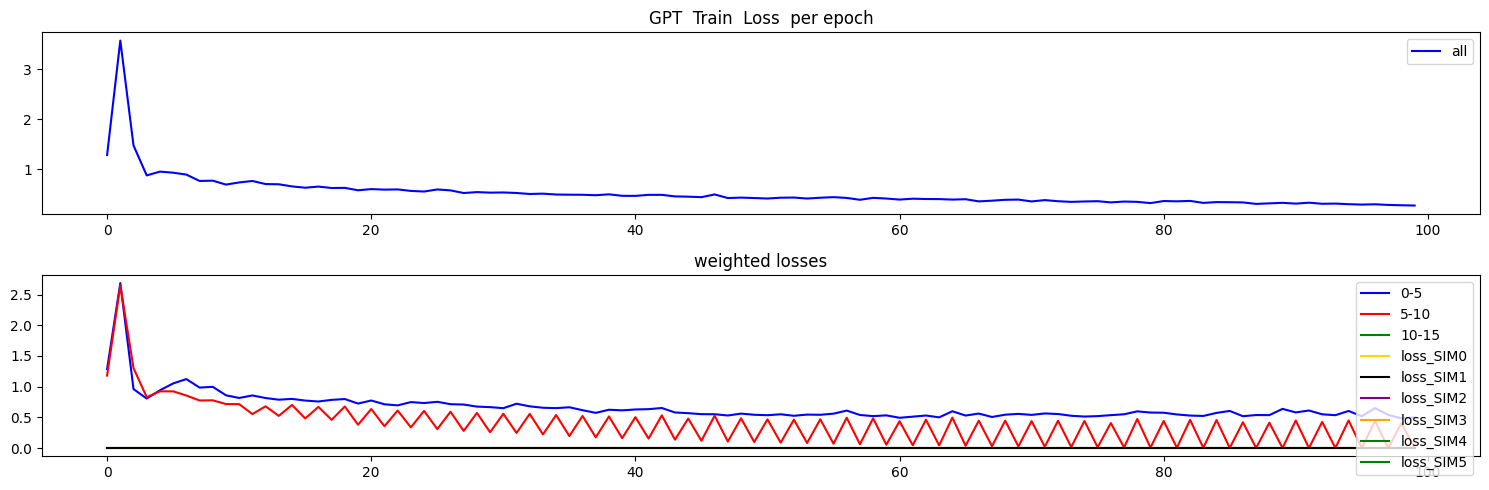

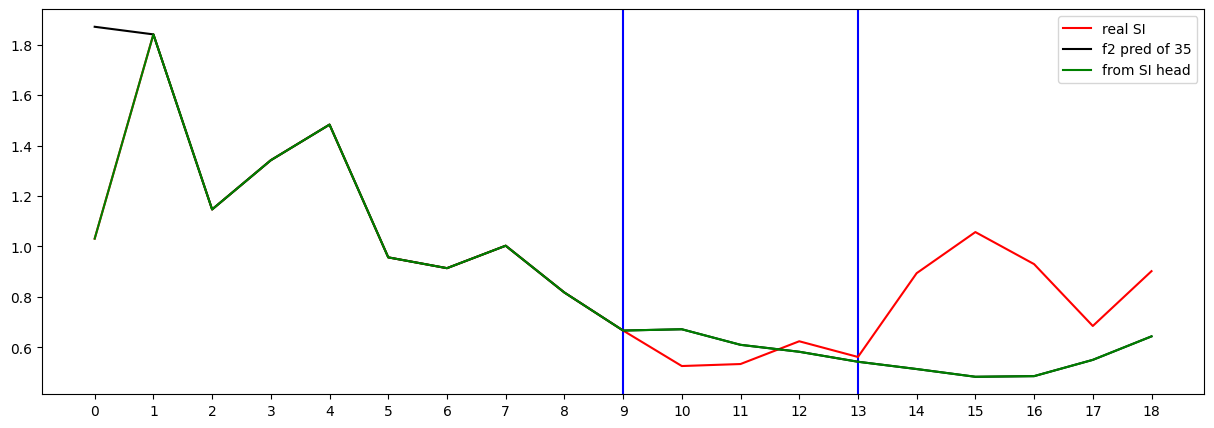

Testing R**2 - (all) - (no inputs):  0.9614050433197067
Testing R**2 - (f2) - SI full (no inputs):  -1.904516794199675
Testing R**2 - SI head only (no inputs):  -1.904516794199675
0 ...index R**2 (no inputs):  -0.35536874043604283
1 ...index R**2 (no inputs):  -4.249025543621118
2 ...index R**2 (no inputs):  -1.904516794199675
3 ...index R**2 (no inputs):  -0.28223642828095086
4 ...index R**2 (no inputs):  -1.779130133836083
5 ...index R**2 (no inputs):  -4.163821586111726
6 ...index R**2 (no inputs):  -3.104101163506529
7 ...index R**2 (no inputs):  -1.5879636289535033
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5551516798669893
10 ...index R**2 (no inputs):  -0.17164753047697312
11 ...index R**2 (no inputs):  -233.3469523612637
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.59118952518527
16 ...index R**2 (no inputs):  -5.765843800200355
17 ...index R**2 (no inputs):  -1

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.177849
Loss_SI: 1.3167320489883423 Loss_all: 1.2309048175811768
===


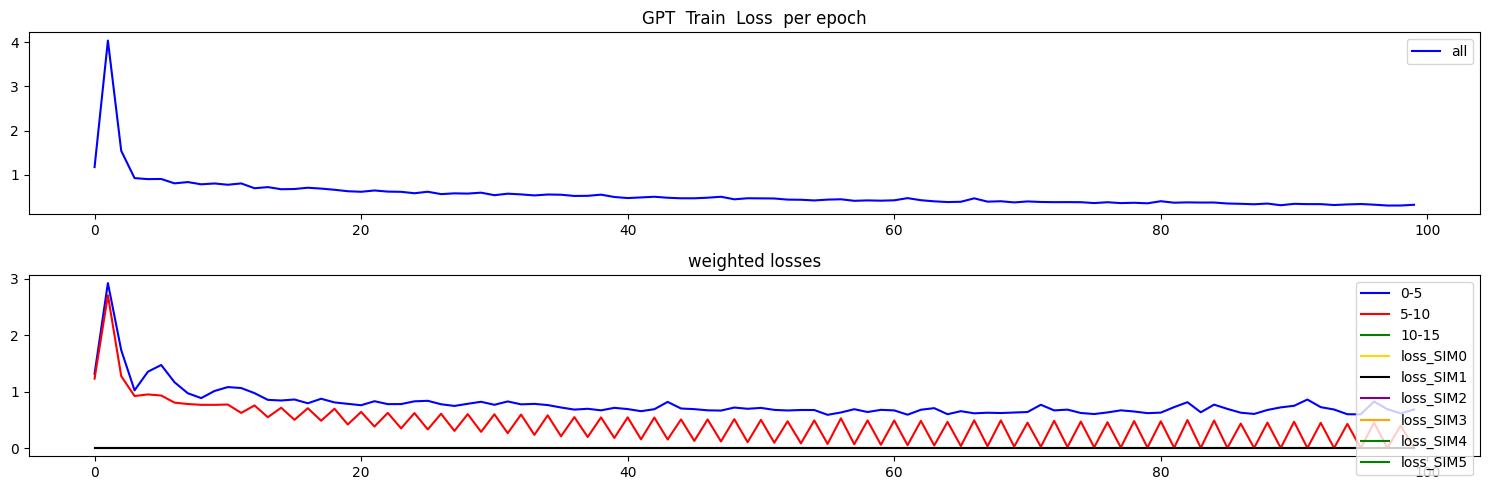

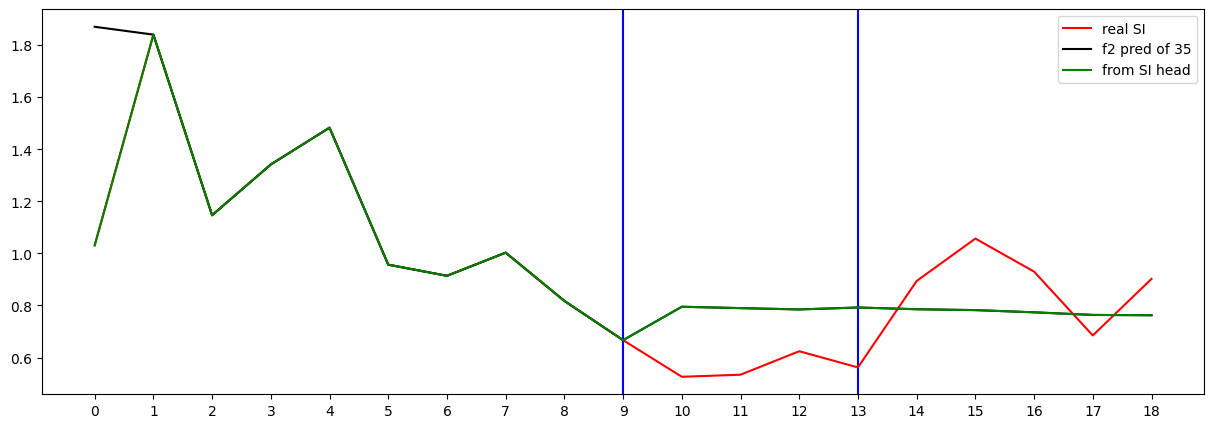

Testing R**2 - (all) - (no inputs):  0.9192532021891856
Testing R**2 - (f2) - SI full (no inputs):  -0.07084858361103197
Testing R**2 - SI head only (no inputs):  -0.07084858361103197
0 ...index R**2 (no inputs):  -0.6136528269862136
1 ...index R**2 (no inputs):  -3.245939662484263
2 ...index R**2 (no inputs):  -0.07084858361103197
3 ...index R**2 (no inputs):  -0.49614909123874695
4 ...index R**2 (no inputs):  -4.965464350893353
5 ...index R**2 (no inputs):  -9.850698348435701
6 ...index R**2 (no inputs):  -0.9868822703419597
7 ...index R**2 (no inputs):  -1.1564796613686212
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20918154251598176
10 ...index R**2 (no inputs):  -0.15202313376716114
11 ...index R**2 (no inputs):  -24.572844404184487
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.928639048140897
16 ...index R**2 (no inputs):  -9.489366634073777
17 ...index R**2 (no inp

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.241588
Loss_SI: 1.3755245208740234 Loss_all: 1.224851131439209
===


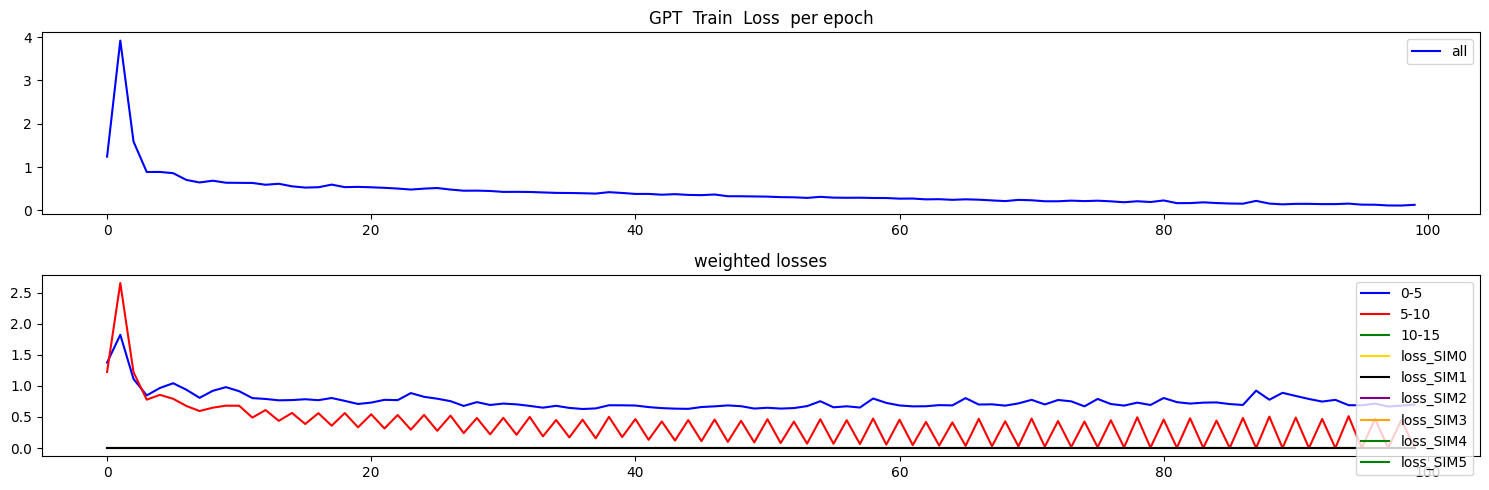

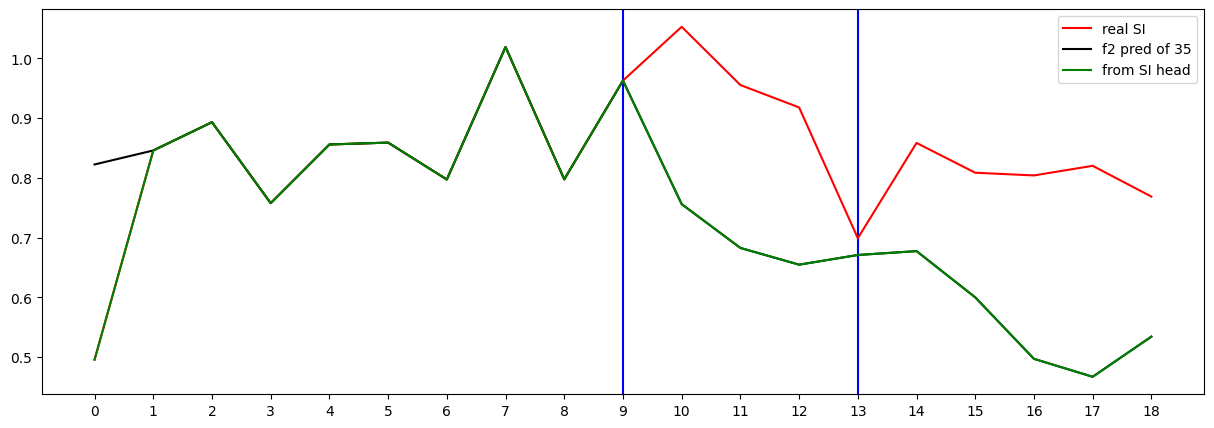

Testing R**2 - (all) - (no inputs):  0.997076442405044
Testing R**2 - (f2) - SI full (no inputs):  -1.671830235322807
Testing R**2 - SI head only (no inputs):  -1.671830235322807
0 ...index R**2 (no inputs):  -0.67889646147468
1 ...index R**2 (no inputs):  -1.0790905919336766
2 ...index R**2 (no inputs):  -1.671830235322807
3 ...index R**2 (no inputs):  -55.002905423369306
4 ...index R**2 (no inputs):  -2.3692814022241215
5 ...index R**2 (no inputs):  -8.875014446894463
6 ...index R**2 (no inputs):  -14.376729556209341
7 ...index R**2 (no inputs):  -18.9512045862255
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09131578930441164
10 ...index R**2 (no inputs):  -0.882252561408319
11 ...index R**2 (no inputs):  -37.211668643529244
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.611327885931534
16 ...index R**2 (no inputs):  -1.6391720442788036
17 ...index R**2 (no inputs):  -156

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.157277
Loss_SI: 1.3177645206451416 Loss_all: 1.2077196836471558
===


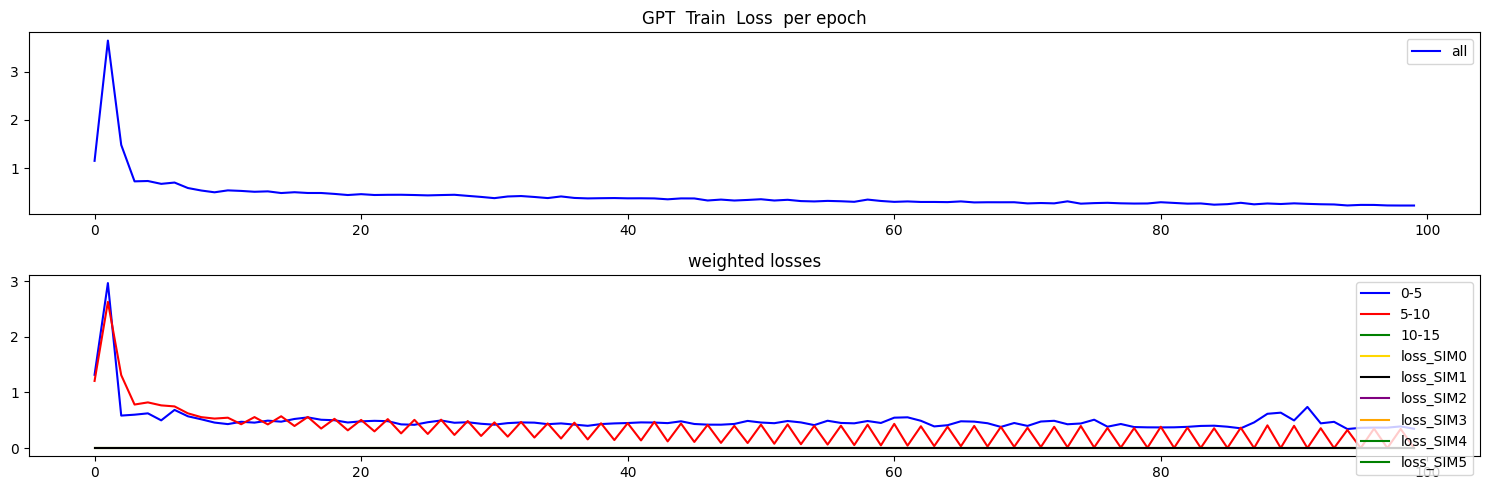

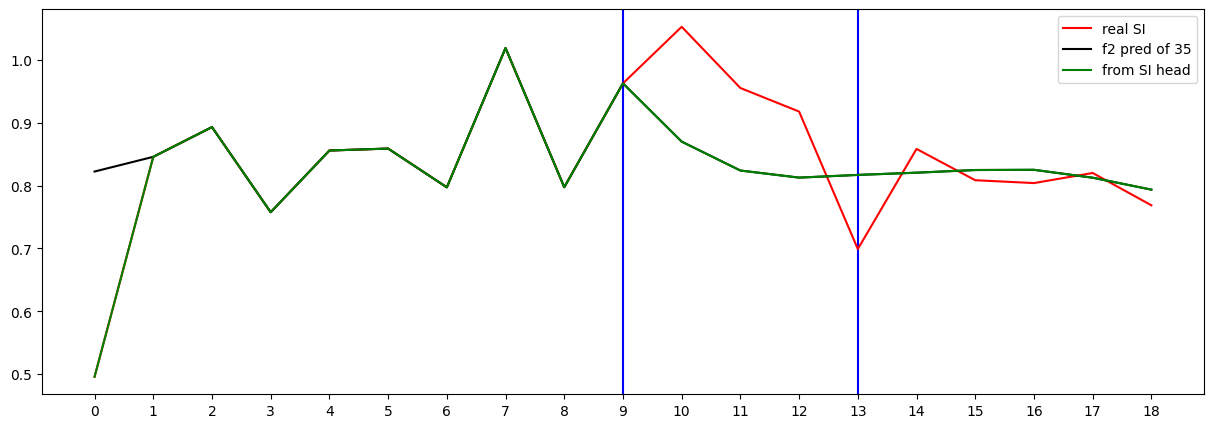

Testing R**2 - (all) - (no inputs):  0.9992820271354597
Testing R**2 - (f2) - SI full (no inputs):  0.15929598529409827
Testing R**2 - SI head only (no inputs):  0.15929598529409827
0 ...index R**2 (no inputs):  -0.08056844600454904
1 ...index R**2 (no inputs):  0.03809207579652607
2 ...index R**2 (no inputs):  0.15929598529409827
3 ...index R**2 (no inputs):  -17.711020549304667
4 ...index R**2 (no inputs):  -190.24170063302037
5 ...index R**2 (no inputs):  -1.036528150147718
6 ...index R**2 (no inputs):  -49.293278240860076
7 ...index R**2 (no inputs):  -10.247707753101546
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.35136594548754263
10 ...index R**2 (no inputs):  -0.053458205773436296
11 ...index R**2 (no inputs):  -8.038032860130562
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.0603127743873833
16 ...index R**2 (no inputs):  -0.2568241909658444
17 ...index R**2 (no in

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.171327
Loss_SI: 1.910976767539978 Loss_all: 1.1683202981948853
===


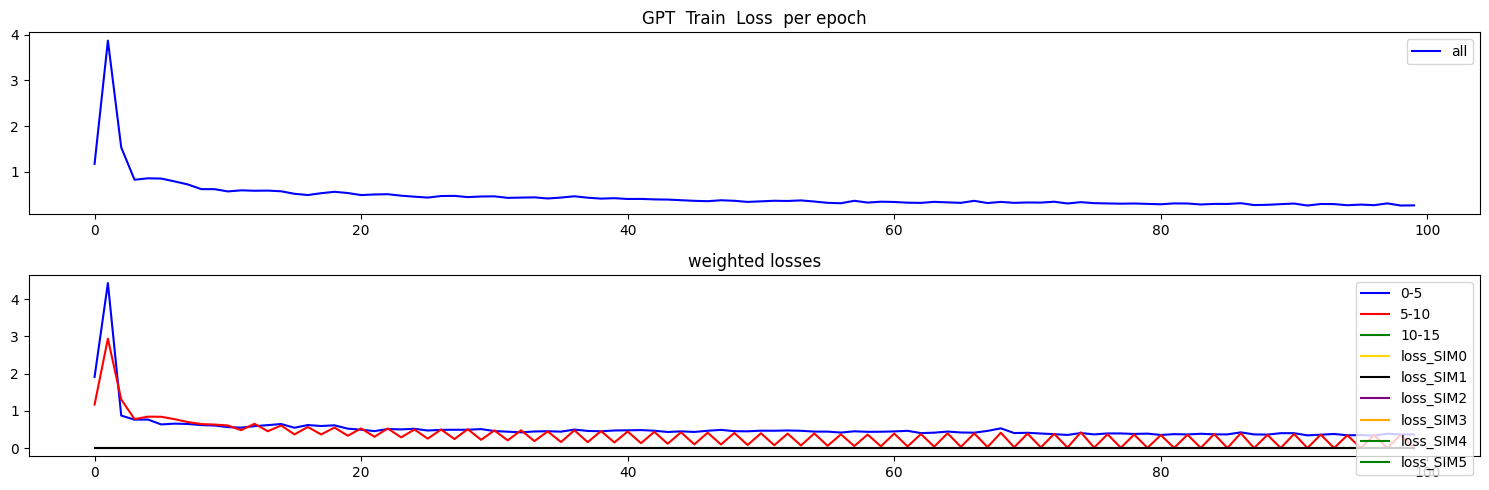

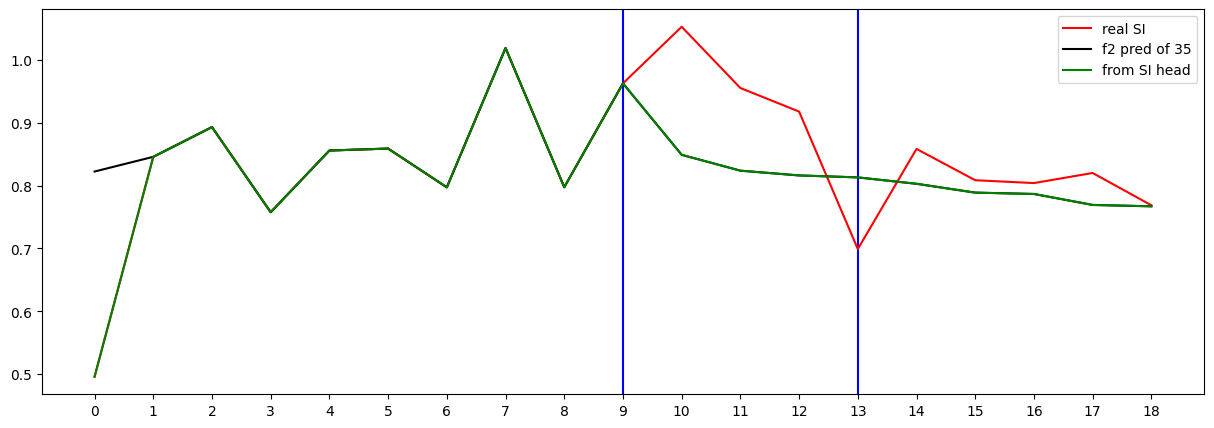

Testing R**2 - (all) - (no inputs):  0.9990159295135282
Testing R**2 - (f2) - SI full (no inputs):  0.23542265334001267
Testing R**2 - SI head only (no inputs):  0.23542265334001267
0 ...index R**2 (no inputs):  -0.14973518678665254
1 ...index R**2 (no inputs):  0.06973586192638503
2 ...index R**2 (no inputs):  0.23542265334001267
3 ...index R**2 (no inputs):  -40.99382816359103
4 ...index R**2 (no inputs):  -1972.9190576012475
5 ...index R**2 (no inputs):  -2.0193260408930924
6 ...index R**2 (no inputs):  -56.13271992337439
7 ...index R**2 (no inputs):  -291.0595555539411
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2916691993893106
10 ...index R**2 (no inputs):  -0.08738707341613527
11 ...index R**2 (no inputs):  -73.49155489342742
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0249639833785928
16 ...index R**2 (no inputs):  -0.07191445242769046
17 ...index R**2 (no input

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.315879
Loss_SI: 1.351981520652771 Loss_all: 1.2838398218154907
===


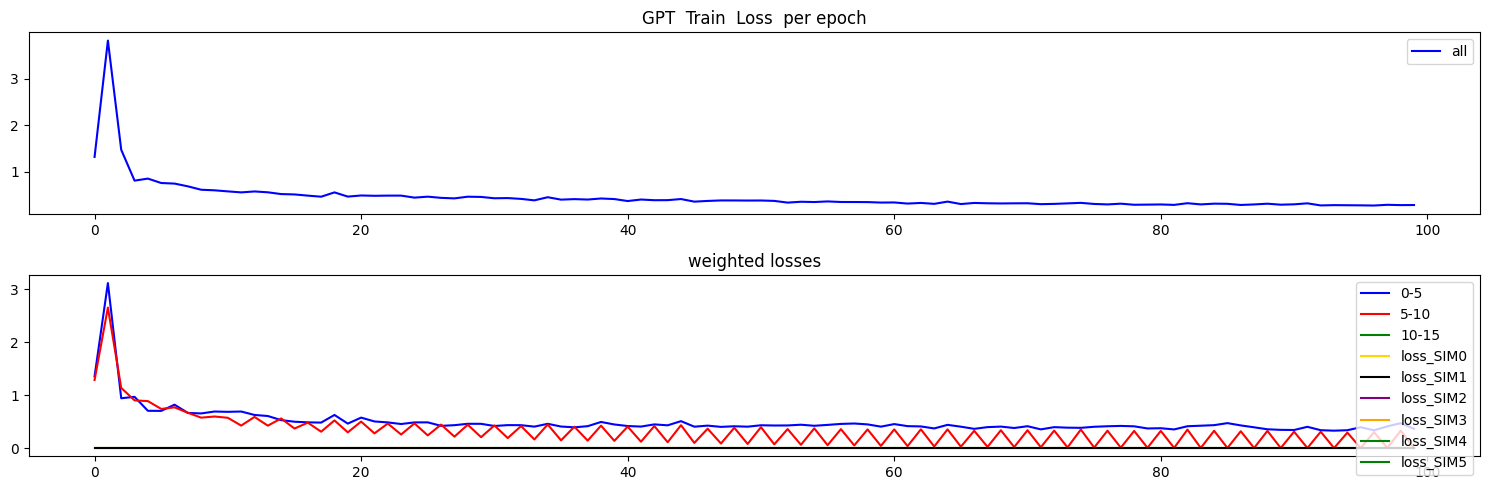

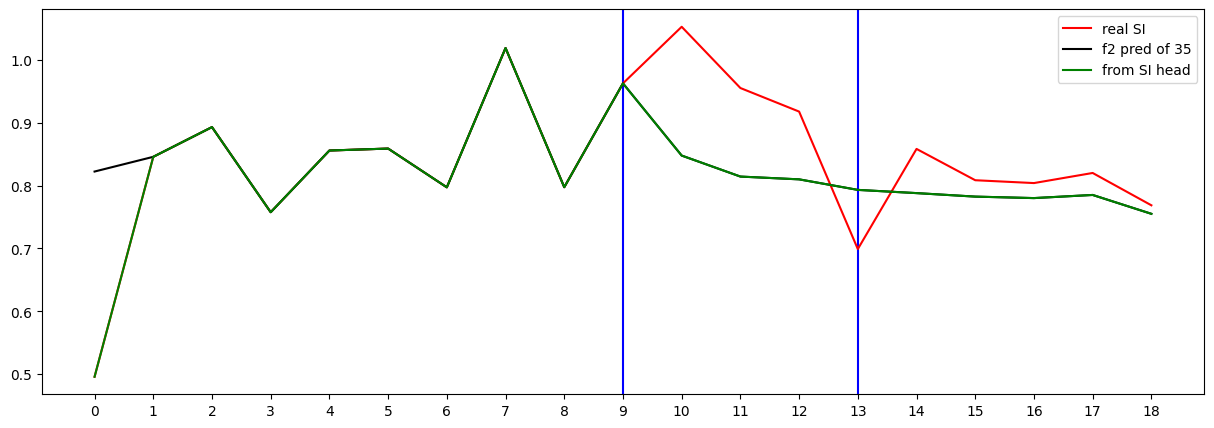

Testing R**2 - (all) - (no inputs):  0.9904617452294161
Testing R**2 - (f2) - SI full (no inputs):  0.2497733169481533
Testing R**2 - SI head only (no inputs):  0.2497733169481533
0 ...index R**2 (no inputs):  -0.5412211368015776
1 ...index R**2 (no inputs):  -0.09787851011263338
2 ...index R**2 (no inputs):  0.2497733169481533
3 ...index R**2 (no inputs):  -18.9264153682921
4 ...index R**2 (no inputs):  -226.9968004846066
5 ...index R**2 (no inputs):  -20.165592744628405
6 ...index R**2 (no inputs):  -149.01141200249947
7 ...index R**2 (no inputs):  -3377.377589400484
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30489906139818346
10 ...index R**2 (no inputs):  -0.10992707789103107
11 ...index R**2 (no inputs):  -274.36802988302753
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2123697781913036
16 ...index R**2 (no inputs):  -0.2079450312644373
17 ...index R**2 (no inputs):

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.257804
Loss_SI: 1.2441610097885132 Loss_all: 1.2232942581176758
===


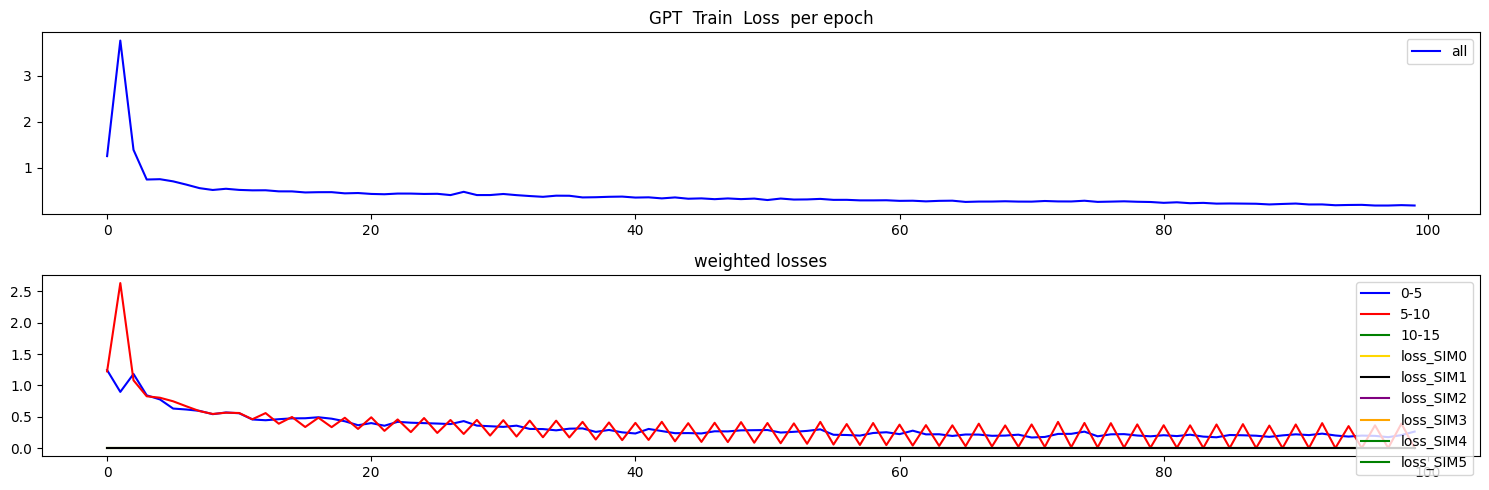

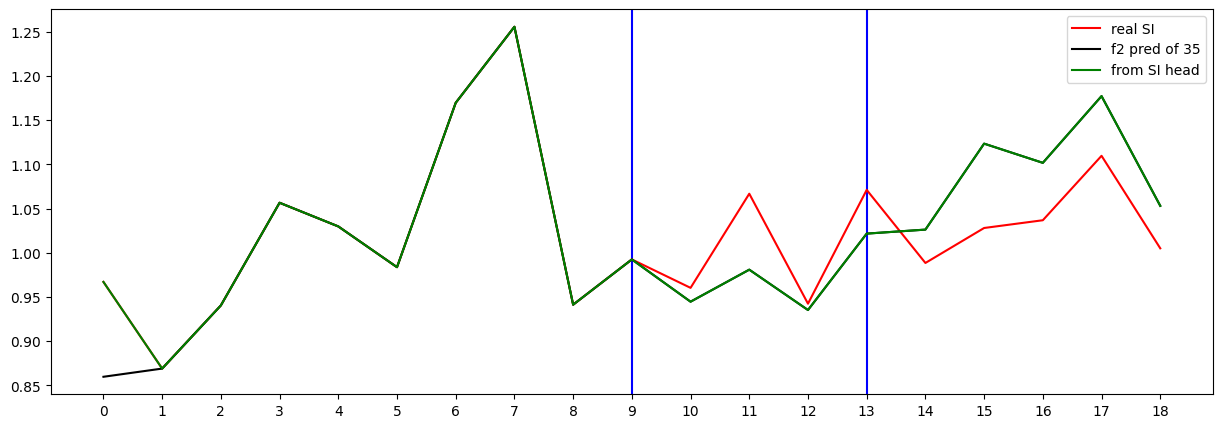

Testing R**2 - (all) - (no inputs):  0.8151680550072082
Testing R**2 - (f2) - SI full (no inputs):  -2.489135186767306
Testing R**2 - SI head only (no inputs):  -2.489135186767306
0 ...index R**2 (no inputs):  -1.370190468374473
1 ...index R**2 (no inputs):  -19.746142378046102
2 ...index R**2 (no inputs):  -2.489135186767306
3 ...index R**2 (no inputs):  -8355.504495941732
4 ...index R**2 (no inputs):  -1607.1764035667093
5 ...index R**2 (no inputs):  -53.21788451394388
6 ...index R**2 (no inputs):  0.20994531066386846
7 ...index R**2 (no inputs):  0.425645508785339
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1943718285171807
10 ...index R**2 (no inputs):  -0.04747097889792129
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.906150125567176
16 ...index R**2 (no inputs):  -3.0946172503804465
17 ...index R**2 (no inputs):  -972.432393391927

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.218192
Loss_SI: 1.2190405130386353 Loss_all: 1.2026829719543457
===


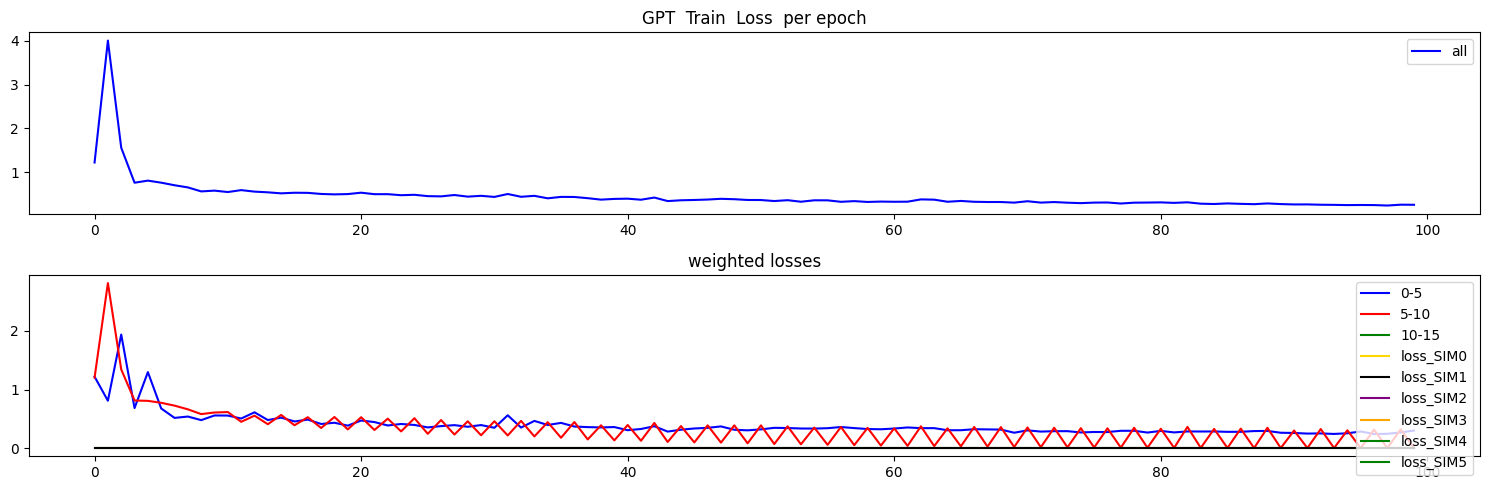

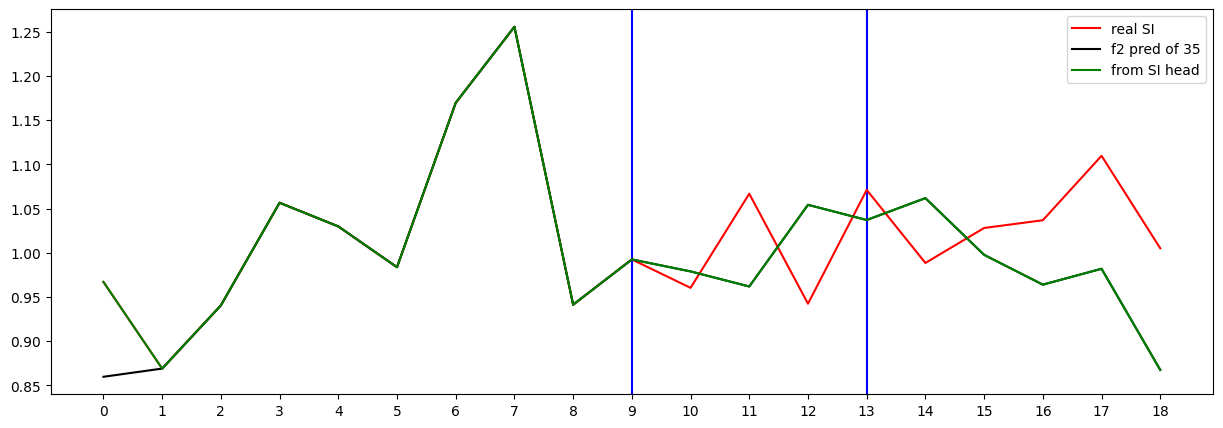

Testing R**2 - (all) - (no inputs):  0.9828079802926448
Testing R**2 - (f2) - SI full (no inputs):  -0.9527987207044744
Testing R**2 - SI head only (no inputs):  -0.9527987207044744
0 ...index R**2 (no inputs):  -1.2360763652369724
1 ...index R**2 (no inputs):  -0.5566653058316606
2 ...index R**2 (no inputs):  -0.9527987207044744
3 ...index R**2 (no inputs):  -329.91062873116283
4 ...index R**2 (no inputs):  -820.654980283001
5 ...index R**2 (no inputs):  -4.010248770342456
6 ...index R**2 (no inputs):  0.00359063004886484
7 ...index R**2 (no inputs):  -3.337875052042966
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1903068880495713
10 ...index R**2 (no inputs):  -0.7475964590020829
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6895230436992381
16 ...index R**2 (no inputs):  -3.6826765895352596
17 ...index R**2 (no inputs):  -619.641836547

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.455451
Loss_SI: 1.7423114776611328 Loss_all: 1.3705331087112427
===


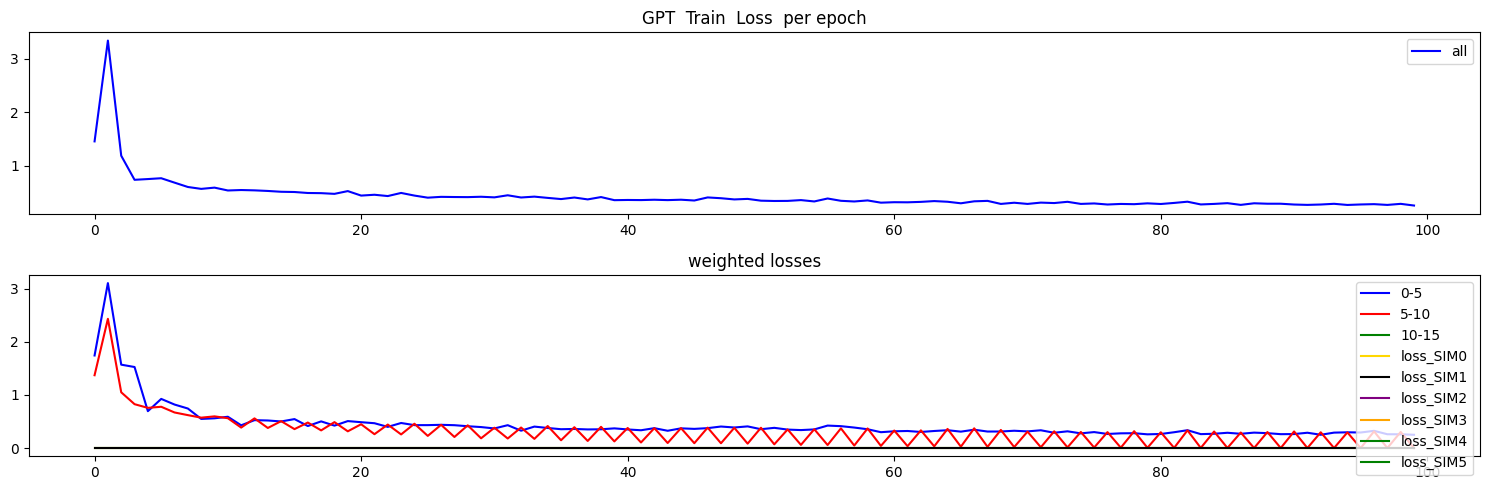

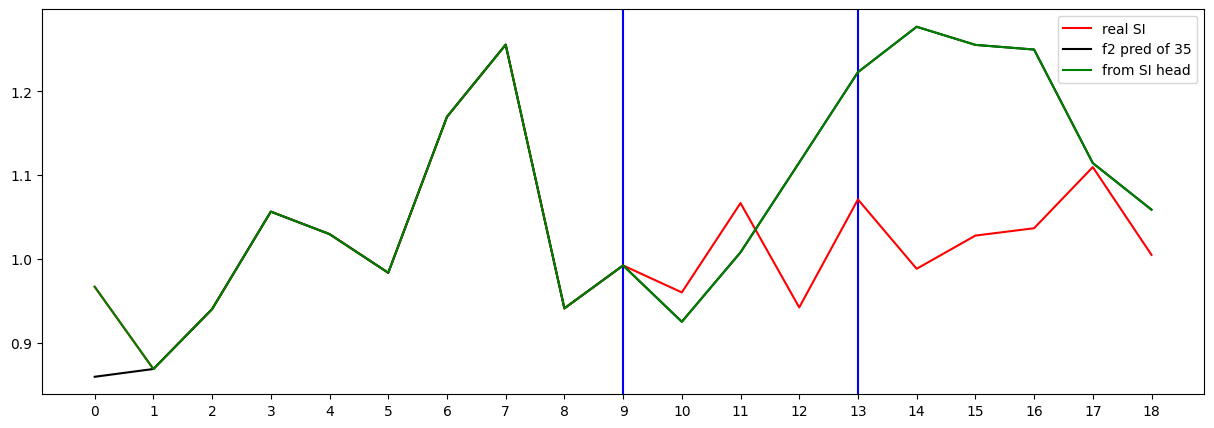

Testing R**2 - (all) - (no inputs):  0.7642972174656859
Testing R**2 - (f2) - SI full (no inputs):  -9.001221707362788
Testing R**2 - SI head only (no inputs):  -9.001221707362788
0 ...index R**2 (no inputs):  -0.9215330600751246
1 ...index R**2 (no inputs):  -3.9079010772919585
2 ...index R**2 (no inputs):  -9.001221707362788
3 ...index R**2 (no inputs):  -15964.374114996483
4 ...index R**2 (no inputs):  -12043.748352382414
5 ...index R**2 (no inputs):  -68.03440661294336
6 ...index R**2 (no inputs):  0.2866821600728954
7 ...index R**2 (no inputs):  -1.3508297802077238
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08177814945713191
10 ...index R**2 (no inputs):  0.08179434755770987
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.166117431201855
16 ...index R**2 (no inputs):  -3.227067157054858
17 ...index R**2 (no inputs):  -3744.4858540852

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.396107
Loss_SI: 1.0712352991104126 Loss_all: 1.3227591514587402
===


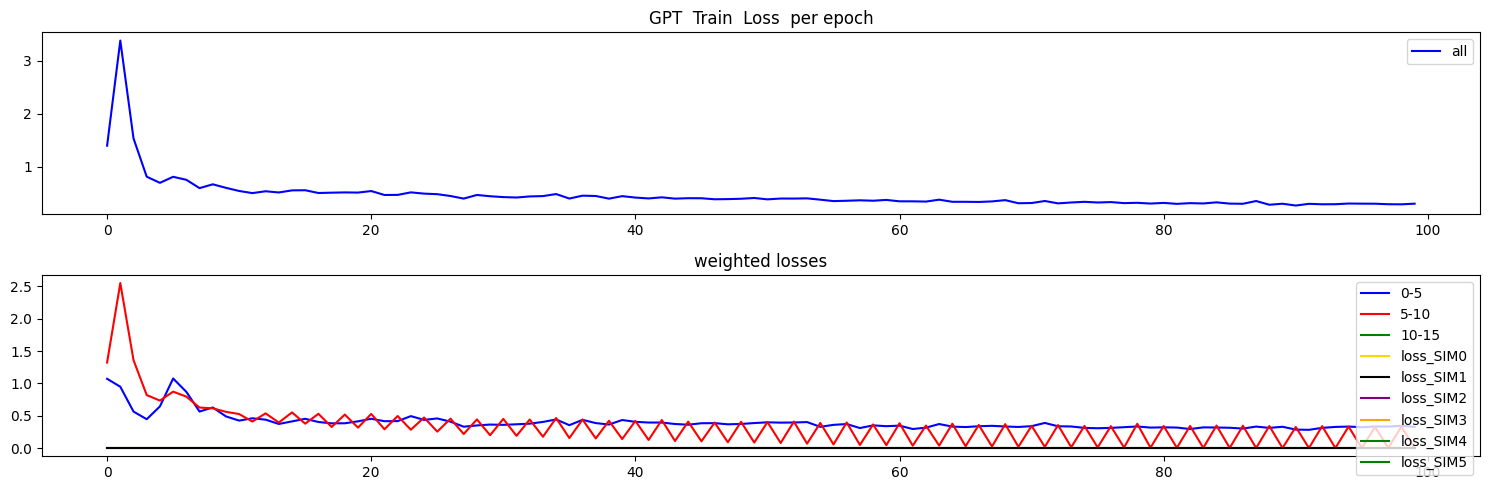

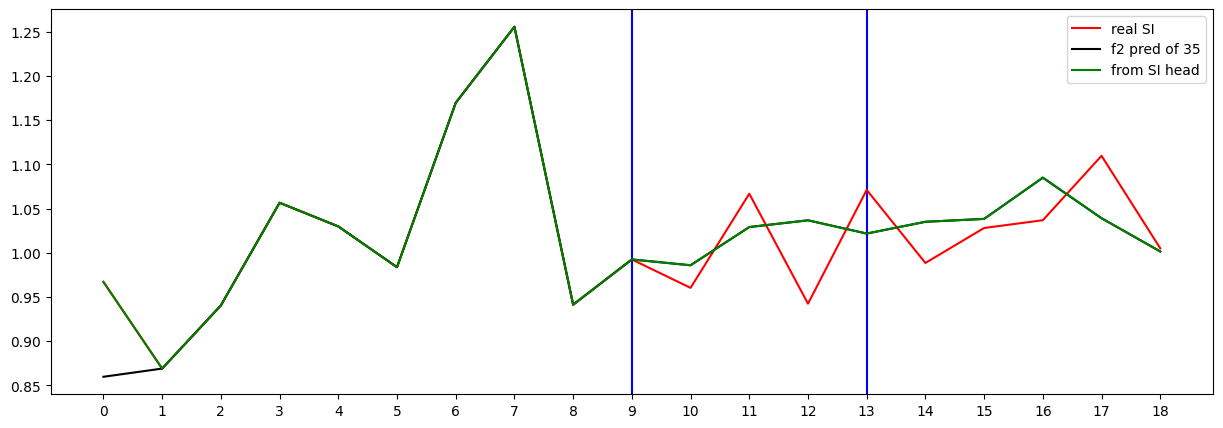

Testing R**2 - (all) - (no inputs):  0.832926788422081
Testing R**2 - (f2) - SI full (no inputs):  0.16168104278053852
Testing R**2 - SI head only (no inputs):  0.16168104278053852
0 ...index R**2 (no inputs):  -0.1321774303839005
1 ...index R**2 (no inputs):  -2.2837704054512606
2 ...index R**2 (no inputs):  0.16168104278053852
3 ...index R**2 (no inputs):  -3170.9137187200613
4 ...index R**2 (no inputs):  -7652.611723542331
5 ...index R**2 (no inputs):  -47.978707355293096
6 ...index R**2 (no inputs):  -0.08367538467373725
7 ...index R**2 (no inputs):  -23.641596831546742
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.023698819150118844
10 ...index R**2 (no inputs):  -0.09692756899562016
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4231810658534434
16 ...index R**2 (no inputs):  -8.196432884678106
17 ...index R**2 (no inputs):  -968.0195

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.3451651952623025


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.5945545419960028


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.22288464190694157


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.3227334569364353



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.9013075375457316
Naive_R2:....................................R²: 0.9507
RMSE:0.1262,MAE:0.1110,MASE:0.1986
1 .......................R² on just step n - R²: 0.9013075375457316
Naive_R2:....................................R²: 0.9507
RMSE:0.1262,MAE:0.1110,MASE:0.1986
2 .....................R² on first n steps - R²: 0.9064266445278961
Naive_R2:....................................R²: 0.9036
RMSE:0.1190,MAE:0.0992,MASE:0.3606
2 .......................R² on just step n - R²: 0.9117513782694822
Naive_R2:....................................R²: 0.9562
RMSE:0.1113,MAE:0.0874,MASE:0.1797
3 .....................R² on first n steps - R²: 0.8695165958416684
Naive_R2:....................................R²: 0.7996
RMSE:0.1353,MAE:0.1099,MASE:0.5027
3 .......................R² on just step n - R²: 0.7622283924722996
Naive_R2:....................................R²: 0.8660
RMSE:0.1631,MAE:0.1313,MASE:0.2962
4 .....................R² on first n steps - R

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.9365087764372986
Naive_R2:....................................R²: 0.9683
RMSE:0.1012,MAE:0.0893,MASE:0.1598
1 .......................R² on just step n - R²: 0.9365087764372986
Naive_R2:....................................R²: 0.9683
RMSE:0.1012,MAE:0.0893,MASE:0.1598
2 .....................R² on first n steps - R²: 0.9486749924475465
Naive_R2:....................................R²: 0.9471
RMSE:0.0881,MAE:0.0759,MASE:0.2759
2 .......................R² on just step n - R²: 0.9623531608090264
Naive_R2:....................................R²: 0.9813
RMSE:0.0727,MAE:0.0625,MASE:0.1286
3 .....................R² on first n steps - R²: 0.9131584355047323
Naive_R2:....................................R²: 0.8666
RMSE:0.1104,MAE:0.0861,MASE:0.3939
3 .......................R² on just step n - R²: 0.812123321780225
Naive_R2:....................................R²: 0.8941
RMSE:0.1450,MAE:0.1065,MASE:0.2403
4 .....................R² on first n steps - R²

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.7266782571458272
Naive_R2:....................................R²: 0.8635
RMSE:0.2100,MAE:0.1554,MASE:0.2779
1 .......................R² on just step n - R²: 0.7266782571458272
Naive_R2:....................................R²: 0.8635
RMSE:0.2100,MAE:0.1554,MASE:0.2779
2 .....................R² on first n steps - R²: 0.6629943009862505
Naive_R2:....................................R²: 0.6527
RMSE:0.2258,MAE:0.1571,MASE:0.5709
2 .......................R² on just step n - R²: 0.5877731312554526
Naive_R2:....................................R²: 0.7954
RMSE:0.2406,MAE:0.1588,MASE:0.3265
3 .....................R² on first n steps - R²: 0.6524225730677187
Naive_R2:....................................R²: 0.4661
RMSE:0.2208,MAE:0.1534,MASE:0.7015
3 .......................R² on just step n - R²: 0.6040454511602769
Naive_R2:....................................R²: 0.7768
RMSE:0.2105,MAE:0.1460,MASE:0.3293
4 .....................R² on first n steps - R

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.44779028213055627
Naive_R2:....................................R²: 0.7242
RMSE:0.2986,MAE:0.1911,MASE:0.3419
1 .......................R² on just step n - R²: 0.44779028213055627
Naive_R2:....................................R²: 0.7242
RMSE:0.2986,MAE:0.1911,MASE:0.3419
2 .....................R² on first n steps - R²: 0.4106974454733885
Naive_R2:....................................R²: 0.3926
RMSE:0.2986,MAE:0.1950,MASE:0.7089
2 .......................R² on just step n - R²: 0.36453385517647896
Naive_R2:....................................R²: 0.6845
RMSE:0.2987,MAE:0.1990,MASE:0.4093
3 .....................R² on first n steps - R²: 0.4371224360068927
Naive_R2:....................................R²: 0.1354
RMSE:0.2810,MAE:0.1907,MASE:0.8723
3 .......................R² on just step n - R²: 0.47659611978918437
Naive_R2:....................................R²: 0.7049
RMSE:0.2420,MAE:0.1821,MASE:0.4107
4 .....................R² on first n steps


## Plot


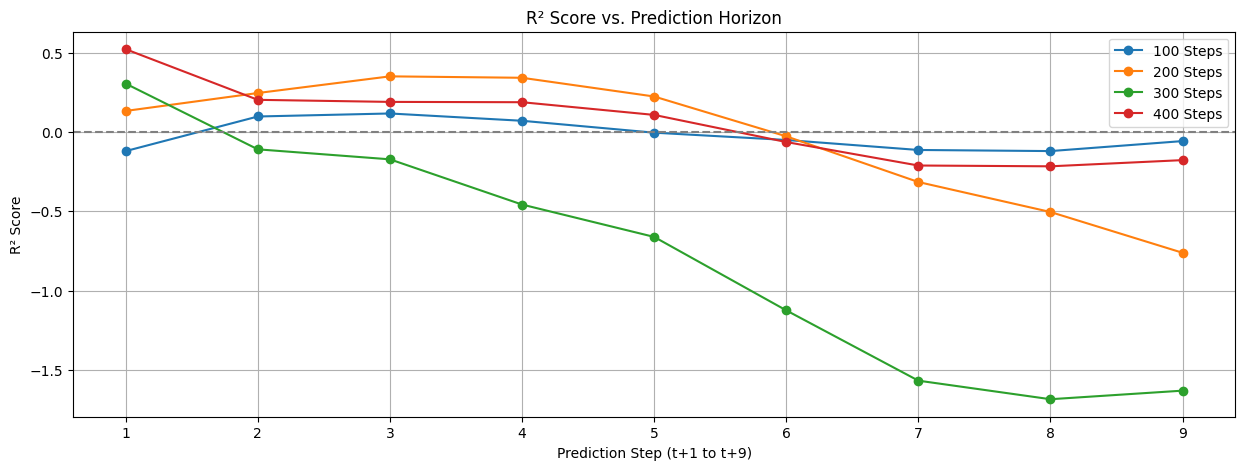

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
